In [153]:
import time
import itertools
import time, os, fnmatch, shutil
import pickle
import re
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns9
from seaborn import plt
import matplotlib

matplotlib.rcParams.update({'font.size': 22})

%matplotlib inline

from __future__ import print_function, division
import requests

In [154]:
pkl_filename_master = "IP_OP_Hosp_cost_dem_inc_df_3_levels.pkl"
with open(pkl_filename_master, 'rb') as picklefile: 
    df_plot_data = pickle.load(picklefile)

In [155]:
df_Plot_1 = df_plot_data.copy()

In [156]:
#df_Model_1 = df_Model_1.drop(['Patient_payment','Patient_Payments_Stdev','Patient_Payments_Avg','Medicare_Payments_Std','Medicare_Payments_Avg','Total_Payments_Stdev','Total_Payments_Avg','Covered_Charges_Stdev','Covered_Charges_Avg','Provider_Name','Average_Covered_Charges','Provider_Street_Address','Provider_City','Hospital_Referral_Region_Description','Total_Discharges','Average_Total_Payments','Meets_criteria_for_meaningful_use_of_EHRs','Readmission_national_comparison','Patient_experience_national_comparison','Average_Medicare_Payments','Hospital_Name', 'County_Name'],1)

df_Plot_1 = df_Plot_1.drop([ u'Average_Medicare_Payments',\
       u'Hospital_Referral_Region_(HRR)_Description',\
       u'Provider_ID', u'Provider_Name',\
       u'Provider_Street_Address',u'Total_Discharges',\
       u'Hospital_Name',u'Patient_payment',\
       u'log_Average_Covered_Charges', u'log_Average_Medicare_Payments',\
       u'log_Average_Total_Payments', u'log_Patient_payment',\
       u'Average_Covered_Charges_mean', u'Average_Covered_Charges_median',\
       u'Average_Covered_Charges_std', u'Average_Medicare_Payments_mean',\
       u'Average_Medicare_Payments_median', u'Average_Medicare_Payments_std',\
       u'Average_Total_Payments_mean', u'Average_Total_Payments_median',\
       u'Average_Total_Payments_std', u'Patient_payment_mean',\
       u'Patient_payment_median', u'Patient_payment_std',\
       u'log_Average_Covered_Charges_mean',\
       u'log_Average_Covered_Charges_median',\
       u'log_Average_Covered_Charges_std',\
       u'log_Average_Medicare_Payments_mean',\
       u'log_Average_Medicare_Payments_median',\
       u'log_Average_Medicare_Payments_std',\
       u'log_Average_Total_Payments_mean',\
       u'log_Average_Total_Payments_median', u'log_Average_Total_Payments_std',\
       u'log_Patient_payment_mean', u'log_Patient_payment_median',\
       u'log_Patient_payment_std', u'Average_Covered_Charges_ST_mean',\
       u'Average_Covered_Charges_ST_median', u'Average_Covered_Charges_ST_std',\
       u'Average_Medicare_Payments_ST_mean',\
       u'Average_Medicare_Payments_ST_median',\
       u'Average_Medicare_Payments_ST_std', u'Average_Total_Payments_ST_mean',\
       u'Average_Total_Payments_ST_median', u'Average_Total_Payments_ST_std',\
       u'Patient_payment_ST_mean', u'Patient_payment_ST_median',\
       u'Patient_payment_ST_std', u'log_Average_Covered_Charges_ST_mean',\
       u'log_Average_Covered_Charges_ST_median',\
       u'log_Average_Covered_Charges_ST_std',\
       u'log_Average_Medicare_Payments_ST_mean',\
       u'log_Average_Medicare_Payments_ST_median',\
       u'log_Average_Medicare_Payments_ST_std',\
       u'log_Average_Total_Payments_ST_mean',\
       u'log_Average_Total_Payments_ST_median',\
       u'log_Average_Total_Payments_ST_std', u'log_Patient_payment_ST_mean',\
       u'log_Patient_payment_ST_median', u'log_Patient_payment_ST_std',\
       u'Average_Covered_Charges_mean_3_bins',\
       u'Average_Medicare_Payments_mean_3_bins',\
       u'Average_Medicare_Payments_mean_ST_3_bins',\
       u'Average_Medicare_Payments_median_3_bins',\
       u'Average_Medicare_Payments_median_ST_3_bins',\
       u'Average_Total_Payments_mean_3_bins',\
       u'Average_Total_Payments_mean_ST_3_bins',\
       u'Average_Total_Payments_median_3_bins',\
       u'Average_Total_Payments_median_ST_3_bins',\
       u'Patient_payment_mean_3_bins', u'Patient_payment_mean_ST_3_bins',\
       u'Patient_payment_median_3_bins', u'Patient_payment_median_ST_3_bins',\
       u'log_Average_Covered_Charges_mean_ST_3_bins',\
       u'log_Average_Medicare_Payments_mean_3_bins',\
       u'log_Average_Medicare_Payments_mean_ST_3_bins',\
       u'log_Average_Medicare_Payments_median_3_bins',\
       u'log_Average_Medicare_Payments_median_ST_3_bins',\
       u'log_Average_Total_Payments_mean_3_bins',\
       u'log_Average_Total_Payments_mean_ST_3_bins',\
       u'log_Average_Total_Payments_median_3_bins',\
       u'log_Average_Total_Payments_median_ST_3_bins',\
       u'log_Patient_payment_mean_3_bins',\
       u'log_Patient_payment_mean_ST_3_bins',\
       u'log_Patient_payment_median_3_bins',\
       u'log_Patient_payment_median_ST_3_bins',\
       u'Percent_female',\
        u'Percent_some_other_race',u'Mean_income_zip',\
                             u'County_Name',],1)
 


In [157]:
df_Plot_1.columns

Index([u'Average_Covered_Charges', u'Average_Total_Payments',
       u'DRG_Definition', u'Provider_City', u'Provider_State',
       u'Provider_Zip_Code', u'Service_type', u'Hospital_Type',
       u'Hospital_Ownership', u'Emergency_Services',
       u'Average_Covered_Charges_mean_ST_3_bins',
       u'Average_Covered_Charges_median_3_bins',
       u'Average_Covered_Charges_median_ST_3_bins',
       u'log_Average_Covered_Charges_mean_3_bins',
       u'log_Average_Covered_Charges_median_3_bins',
       u'log_Average_Covered_Charges_median_ST_3_bins',
       u'DRG_Definition_count', u'State_spelled', u'County_State', u'County',
       u'State', u'Median_Age', u'Percent_Occupied_Housing_Units_x',
       u'Percent_over_65', u'Percent_Native_American', u'Percent_asian',
       u'Percent Black or African American', u'Percent_hispanic_or_latino',
       u'Percent_Male', u'Percent_Occupied_Housing_Units_y', u'Percent_white',
       u'Rental_vacancy_rate', u'Homeowner_vacancy_rate',
       u'Avera

In [158]:
df_Plot_1['Payment_Ratio'] = df_Plot_1[u'Average_Total_Payments']/df_Plot_1[u'Average_Covered_Charges']

In [159]:
column_list = [u'Average_Covered_Charges_mean_ST_3_bins',\
       u'Average_Covered_Charges_median_3_bins',\
       u'Average_Covered_Charges_median_ST_3_bins',\
       u'log_Average_Covered_Charges_mean_3_bins',\
       u'log_Average_Covered_Charges_median_3_bins',\
       u'log_Average_Covered_Charges_median_ST_3_bins']

for column in column_list: 
        df_Plot_1[column]=pd.to_numeric(df_Plot_1[column])
        df_Plot_1[column] = df_Plot_1[column].astype(float)

In [160]:
df_Plot_1.dtypes

Average_Covered_Charges                         float64
Average_Total_Payments                          float64
DRG_Definition                                   object
Provider_City                                    object
Provider_State                                   object
Provider_Zip_Code                                 int64
Service_type                                     object
Hospital_Type                                    object
Hospital_Ownership                               object
Emergency_Services                               object
Average_Covered_Charges_mean_ST_3_bins          float64
Average_Covered_Charges_median_3_bins           float64
Average_Covered_Charges_median_ST_3_bins        float64
log_Average_Covered_Charges_mean_3_bins         float64
log_Average_Covered_Charges_median_3_bins       float64
log_Average_Covered_Charges_median_ST_3_bins    float64
DRG_Definition_count                              int64
State_spelled                                   

In [161]:
df_Plot_1a = df_Plot_1[df_Plot_1.Service_type == '0']

In [162]:
df_Plot_1b = df_Plot_1[df_Plot_1.Service_type == '1']

In [163]:
df_Plot_1a = df_Plot_1a[df_Plot_1a.DRG_Definition_count >= 1500]

In [164]:
df_Plot_1a['DRG_Definition'].value_counts()

871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC                      2837
194 - SIMPLE PNEUMONIA & PLEURISY W CC                                        2837
292 - HEART FAILURE & SHOCK W CC                                              2774
392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC                  2743
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC                               2731
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC      2702
603 - CELLULITIS W/O MCC                                                      2653
291 - HEART FAILURE & SHOCK W MCC                                             2646
872 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W/O MCC                    2588
190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC                             2585
641 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W/O MCC      2559
193 - SIMPLE PNEUMONIA & PLEURISY W MCC                                       2530
191 

In [304]:
df_Plot_1a_chest_pain = df_Plot_1a[df_Plot_1a.DRG_Definition == '313 - CHEST PAIN']

In [305]:
df_Plot_1a_chest_pain.columns

Index([u'Average_Covered_Charges', u'Average_Total_Payments',
       u'DRG_Definition', u'Provider_City', u'Provider_State',
       u'Provider_Zip_Code', u'Service_type', u'Hospital_Type',
       u'Hospital_Ownership', u'Emergency_Services',
       u'Average_Covered_Charges_mean_ST_3_bins',
       u'Average_Covered_Charges_median_3_bins',
       u'Average_Covered_Charges_median_ST_3_bins',
       u'log_Average_Covered_Charges_mean_3_bins',
       u'log_Average_Covered_Charges_median_3_bins',
       u'log_Average_Covered_Charges_median_ST_3_bins',
       u'DRG_Definition_count', u'State_spelled', u'County_State', u'County',
       u'State', u'Median_Age', u'Percent_Occupied_Housing_Units_x',
       u'Percent_over_65', u'Percent_Native_American', u'Percent_asian',
       u'Percent Black or African American', u'Percent_hispanic_or_latino',
       u'Percent_Male', u'Percent_Occupied_Housing_Units_y', u'Percent_white',
       u'Rental_vacancy_rate', u'Homeowner_vacancy_rate',
       u'Avera

In [306]:
df_Plot_1a_chest_pain.dtypes

Average_Covered_Charges                         float64
Average_Total_Payments                          float64
DRG_Definition                                   object
Provider_City                                    object
Provider_State                                   object
Provider_Zip_Code                                 int64
Service_type                                     object
Hospital_Type                                    object
Hospital_Ownership                               object
Emergency_Services                               object
Average_Covered_Charges_mean_ST_3_bins          float64
Average_Covered_Charges_median_3_bins           float64
Average_Covered_Charges_median_ST_3_bins        float64
log_Average_Covered_Charges_mean_3_bins         float64
log_Average_Covered_Charges_median_3_bins       float64
log_Average_Covered_Charges_median_ST_3_bins    float64
DRG_Definition_count                              int64
State_spelled                                   

In [396]:
df_Plot_1a_chest_pain_CA = df_Plot_1a_chest_pain[df_Plot_1a_chest_pain['Provider_State'] == 'CO']

In [397]:
df_Plot_1a_chest_pain_CA_city = df_Plot_1a_chest_pain_CA.groupby('Provider_City').mean()

In [398]:
df_Plot_1a_chest_pain_CA_city_plot = df_Plot_1a_chest_pain_CA_city.drop([u'Average_Total_Payments',\
       u'Provider_Zip_Code', u'Average_Covered_Charges_mean_ST_3_bins',\
       u'Average_Covered_Charges_median_3_bins',\
       u'Average_Covered_Charges_median_ST_3_bins',\
       u'log_Average_Covered_Charges_mean_3_bins',\
       u'log_Average_Covered_Charges_median_3_bins',\
       u'log_Average_Covered_Charges_median_ST_3_bins',\
       u'DRG_Definition_count', u'Median_Age',\
       u'Percent_Occupied_Housing_Units_x', u'Percent_over_65',\
       u'Percent_Native_American', u'Percent_asian',\
       u'Percent Black or African American', u'Percent_hispanic_or_latino',\
       u'Percent_Male', u'Percent_Occupied_Housing_Units_y', u'Percent_white',\
       u'Rental_vacancy_rate', u'Homeowner_vacancy_rate',\
       u'Average_family_size', u'Median_income_zip', u'Zip_population',\
       u'Payment_Ratio'],1)

In [399]:
df_Plot_1a_chest_pain_CA_city_plot

,Average_Covered_Charges
Provider_City,
AURORA,28345.199885
BOULDER,36352.545450
COLORADO SPRING,24576.292795
DENVER,39423.363640
ENGLEWOOD,35208.555560
FORT COLLINS,17484.764710
GRAND JUNCTION,16976.756100
GREELEY,18506.703700
LITTLETON,33338.875000


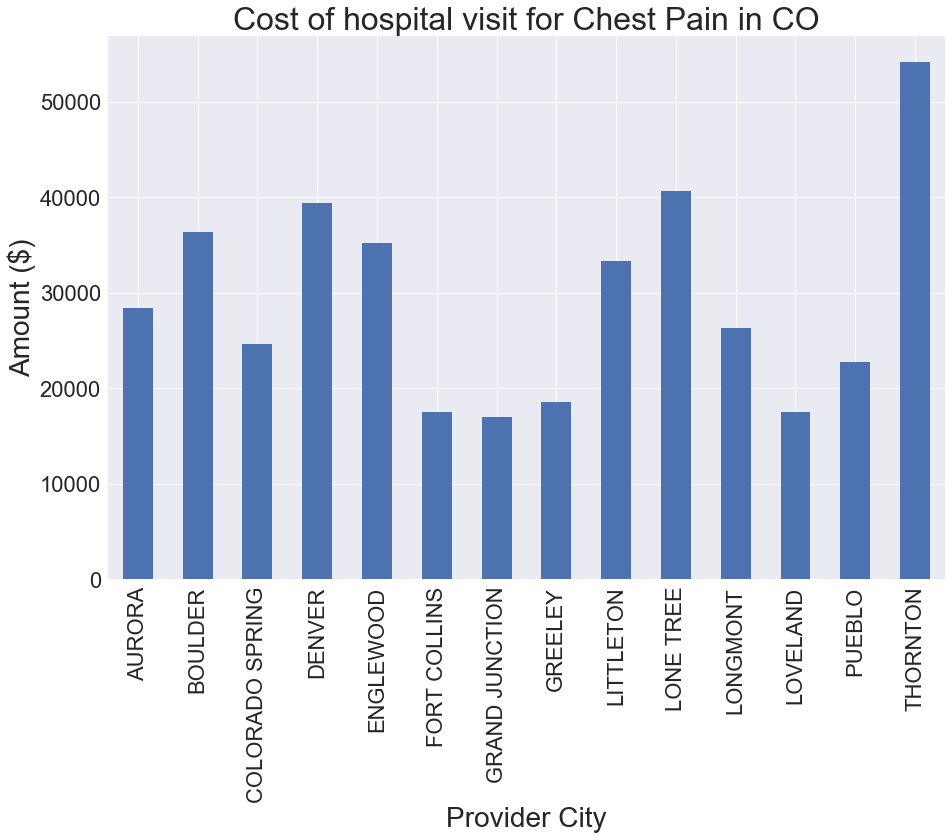

In [406]:
my_plot = df_Plot_1a_chest_pain_CA_city_plot[u'Average_Covered_Charges'].plot(kind='bar', fontsize=22, figsize=(15,10),legend=None)
#my_plot.set_fontsize(20)
my_plot.set_xlabel("Provider City",fontsize=28)
my_plot.set_ylabel("Amount ($)", fontsize=28)
my_plot.set_title("Cost of hospital visit for Chest Pain in CO", fontsize=32)

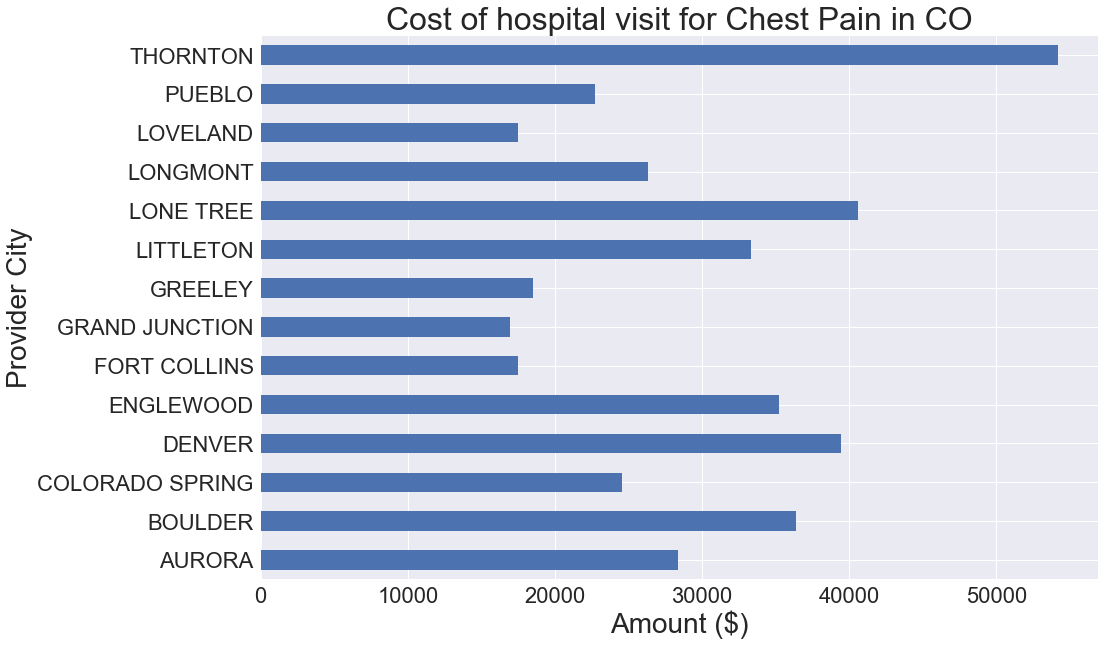

In [407]:
my_plot = df_Plot_1a_chest_pain_CA_city_plot[u'Average_Covered_Charges'].plot(kind='barh', fontsize=22, figsize=(15,10),legend=None)
#my_plot.set_fontsize(20)
my_plot.set_xlabel("Amount ($)",fontsize=28)
my_plot.set_ylabel("Provider City", fontsize=28)
my_plot.set_title("Cost of hospital visit for Chest Pain in CO", fontsize=32)

In [307]:
df_Plot_1a_chest_pain.groupby(['Provider_State']).mean()

,Average_Covered_Charges,Average_Total_Payments,Provider_Zip_Code,Average_Covered_Charges_mean_ST_3_bins,Average_Covered_Charges_median_3_bins,Average_Covered_Charges_median_ST_3_bins,log_Average_Covered_Charges_mean_3_bins,log_Average_Covered_Charges_median_3_bins,log_Average_Covered_Charges_median_ST_3_bins,DRG_Definition_count,...,Percent_hispanic_or_latino,Percent_Male,Percent_Occupied_Housing_Units_y,Percent_white,Rental_vacancy_rate,Homeowner_vacancy_rate,Average_family_size,Median_income_zip,Zip_population,Payment_Ratio
Provider_State,,,,,,,,,,,,,,,,,,,,,
AK,16053.875000,5277.750000,99669.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1719.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59493.860400,14191.000000,0.328752
AL,19780.970288,3899.368282,35912.210526,1.000000,0.921053,1.000000,0.894737,0.894737,1.0,1719.0,...,3.434211,48.431579,87.084211,66.752632,12.286842,2.755263,3.007632,42438.530370,21671.939394,0.254422
AR,16938.580333,4053.576691,72356.086957,1.043478,0.608696,1.043478,0.565217,0.565217,1.0,1719.0,...,6.609091,48.822727,88.686364,76.636364,10.636364,2.504545,2.985909,41755.293750,30355.277778,0.273084
AZ,24815.210627,5126.149122,85525.642857,0.964286,1.500000,0.964286,1.535714,1.535714,1.0,1719.0,...,28.307143,49.507143,83.767857,75.303571,12.607143,3.907143,3.148929,47818.761963,32008.962963,0.216199
CA,34932.649896,6640.660835,92680.224359,0.993590,1.769231,0.993590,1.762821,1.782051,1.0,1719.0,...,39.553548,49.639355,92.374839,56.577419,6.526452,2.113548,3.483355,61195.513472,40445.653333,0.223470
CO,28656.492052,4450.261037,80511.058824,1.058824,1.588235,1.058824,1.588235,1.588235,1.0,1719.0,...,21.941176,49.670588,92.970588,80.582353,6.935294,2.282353,3.105294,53711.326475,30111.625000,0.172914
CT,18316.420685,5444.033201,6431.050000,1.050000,0.900000,1.050000,0.800000,0.800000,1.0,1719.0,...,13.055000,48.735000,92.110000,78.105000,8.260000,1.660000,3.080000,56343.019494,29135.187500,0.318259
DC,18298.930700,6994.464122,20027.166667,1.000000,0.833333,1.000000,0.666667,0.666667,1.0,1719.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53159.471240,22937.000000,0.413979
DE,15489.875466,4558.577534,19869.000000,1.200000,0.400000,1.200000,0.400000,0.600000,1.0,1719.0,...,8.080000,48.500000,81.540000,71.360000,11.660000,2.680000,3.018000,50823.518475,28712.000000,0.316125


In [308]:
df_Plot_1a_chest_pain[df_Plot_1a_chest_pain['Provider_State'] == 'NJ']

,Average_Covered_Charges,Average_Total_Payments,DRG_Definition,Provider_City,Provider_State,Provider_Zip_Code,Service_type,Hospital_Type,Hospital_Ownership,Emergency_Services,...,Percent_hispanic_or_latino,Percent_Male,Percent_Occupied_Housing_Units_y,Percent_white,Rental_vacancy_rate,Homeowner_vacancy_rate,Average_family_size,Median_income_zip,Zip_population,Payment_Ratio
94695,33742.52632,5634.315789,313 - CHEST PAIN,HACKENSACK,NJ,7601,0,Acute Care Hospitals,Voluntary non-profit - Private,True,...,16.1,48.2,95.3,71.9,5.6,1.2,3.20,57731.8113,42679.0,0.166980
94696,40992.22222,8390.611111,313 - CHEST PAIN,NEWARK,NJ,7112,0,Acute Care Hospitals,Voluntary non-profit - Private,True,...,20.3,48.0,90.7,42.6,9.6,2.5,3.29,39986.6719,27039.0,0.204688
94697,28416.05714,6303.200000,313 - CHEST PAIN,NORTH BERGEN,NJ,7047,0,Acute Care Hospitals,Voluntary non-profit - Private,True,...,42.2,49.5,91.2,54.0,6.6,4.5,3.20,53820.8841,58090.0,0.221818
94698,23211.97222,6045.000000,313 - CHEST PAIN,PASSAIC,NJ,7055,0,Acute Care Hospitals,Proprietary,True,...,37.0,48.5,94.8,62.6,4.8,1.4,3.45,34290.9277,67808.0,0.260426
94699,24300.15789,4403.473684,313 - CHEST PAIN,TEANECK,NJ,7666,0,Acute Care Hospitals,Voluntary non-profit - Private,True,...,16.1,48.2,95.3,71.9,5.6,1.2,3.20,98855.2563,39343.0,0.181212
94700,37523.69811,5027.245283,313 - CHEST PAIN,BELLEVILLE,NJ,7109,0,Acute Care Hospitals,Voluntary non-profit - Private,True,...,20.3,48.0,90.7,42.6,9.6,2.5,3.29,63190.2043,35954.0,0.133975
94701,28612.72414,4124.068966,313 - CHEST PAIN,PLAINSBORO,NJ,8536,0,Acute Care Hospitals,Voluntary non-profit - Private,True,...,18.4,49.1,95.4,58.6,5.3,1.4,3.29,88644.2332,17773.0,0.144134
94702,18553.33333,4027.666667,313 - CHEST PAIN,CAPE MAY COURT,NJ,8210,0,Acute Care Hospitals,Voluntary non-profit - Private,True,...,6.2,48.6,41.5,89.8,28.9,4.5,2.89,66351.3515,15100.0,0.217086
94703,26213.15217,4782.586957,313 - CHEST PAIN,RIDGEWOOD,NJ,7450,0,Acute Care Hospitals,Voluntary non-profit - Private,True,...,16.1,48.2,95.3,71.9,5.6,1.2,3.20,150932.8159,24926.0,0.182450
94704,30097.89286,7264.214286,313 - CHEST PAIN,CAMDEN,NJ,8103,0,Acute Care Hospitals,Voluntary non-profit - Private,True,...,14.2,48.2,93.2,65.3,9.0,1.7,3.22,27980.1231,15898.0,0.241353


In [309]:
df_Plot_1a_chest_pain[df_Plot_1a_chest_pain['Provider_State'] == 'MD']

,Average_Covered_Charges,Average_Total_Payments,DRG_Definition,Provider_City,Provider_State,Provider_Zip_Code,Service_type,Hospital_Type,Hospital_Ownership,Emergency_Services,...,Percent_hispanic_or_latino,Percent_Male,Percent_Occupied_Housing_Units_y,Percent_white,Rental_vacancy_rate,Homeowner_vacancy_rate,Average_family_size,Median_income_zip,Zip_population,Payment_Ratio
94438,4822.750000,4460.480769,313 - CHEST PAIN,HAGERSTOWN,MD,21742,0,Acute Care Hospitals,Voluntary non-profit - Private,True,...,3.5,50.8,91.6,85.1,9.6,2.6,3.01,56960.8111,22072.0,0.924883
94439,7153.289474,6739.342105,313 - CHEST PAIN,BALTIMORE,MD,21201,0,Acute Care Hospitals,Voluntary non-profit - Private,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28936.5086,14548.0,0.942132
94440,6833.754386,6333.771930,313 - CHEST PAIN,CHEVERLY,MD,20785,0,Acute Care Hospitals,Voluntary non-profit - Private,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60857.3651,38685.0,0.926836
94441,5709.568627,5277.058824,313 - CHEST PAIN,SILVER SPRING,MD,20910,0,Acute Care Hospitals,Voluntary non-profit - Church,True,...,17.0,48.0,95.0,57.5,5.4,1.5,3.22,79329.3558,35150.0,0.924248
94442,5425.648649,5082.459459,313 - CHEST PAIN,FREDERICK,MD,21701,0,Acute Care Hospitals,Voluntary non-profit - Private,True,...,7.3,49.2,94.1,81.5,6.7,1.8,3.17,74184.4531,32687.0,0.936747
94443,6499.666667,6073.722222,313 - CHEST PAIN,HAVRE DE GRACE,MD,21078,0,Acute Care Hospitals,Voluntary non-profit - Private,True,...,3.5,48.9,94.4,81.2,8.2,1.8,3.13,67820.6787,15859.0,0.934467
94444,10111.736840,9330.210526,313 - CHEST PAIN,BALTIMORE,MD,21202,0,Acute Care Hospitals,Voluntary non-profit - Church,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15614.6645,14160.0,0.922711
94445,9211.816092,8521.195402,313 - CHEST PAIN,BALTIMORE,MD,21287,0,Acute Care Hospitals,Voluntary non-profit - Private,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.925029
94446,7298.378378,6740.459459,313 - CHEST PAIN,BALTIMORE,MD,21229,0,Acute Care Hospitals,Voluntary non-profit - Church,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41620.8911,50025.0,0.923556
94447,6492.513514,6036.360360,313 - CHEST PAIN,BALTIMORE,MD,21215,0,Acute Care Hospitals,Voluntary non-profit - Other,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36968.7544,65216.0,0.929742


In [310]:
Chest_pain_by_state = df_Plot_1a_chest_pain.groupby(['Provider_State'])

In [311]:
Chest_pain_by_state.columns

AttributeError: Cannot access attribute 'columns' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [312]:
Chest_pain_by_state_mean = Chest_pain_by_state.mean()

In [313]:
Chest_pain_by_state_mean = Chest_pain_by_state_mean.sort_values(by='Average_Covered_Charges',ascending=False)

In [314]:
Chest_pain_by_state_mean.columns

Index([u'Average_Covered_Charges', u'Average_Total_Payments',
       u'Provider_Zip_Code', u'Average_Covered_Charges_mean_ST_3_bins',
       u'Average_Covered_Charges_median_3_bins',
       u'Average_Covered_Charges_median_ST_3_bins',
       u'log_Average_Covered_Charges_mean_3_bins',
       u'log_Average_Covered_Charges_median_3_bins',
       u'log_Average_Covered_Charges_median_ST_3_bins',
       u'DRG_Definition_count', u'Median_Age',
       u'Percent_Occupied_Housing_Units_x', u'Percent_over_65',
       u'Percent_Native_American', u'Percent_asian',
       u'Percent Black or African American', u'Percent_hispanic_or_latino',
       u'Percent_Male', u'Percent_Occupied_Housing_Units_y', u'Percent_white',
       u'Rental_vacancy_rate', u'Homeowner_vacancy_rate',
       u'Average_family_size', u'Median_income_zip', u'Zip_population',
       u'Payment_Ratio'],
      dtype='object')

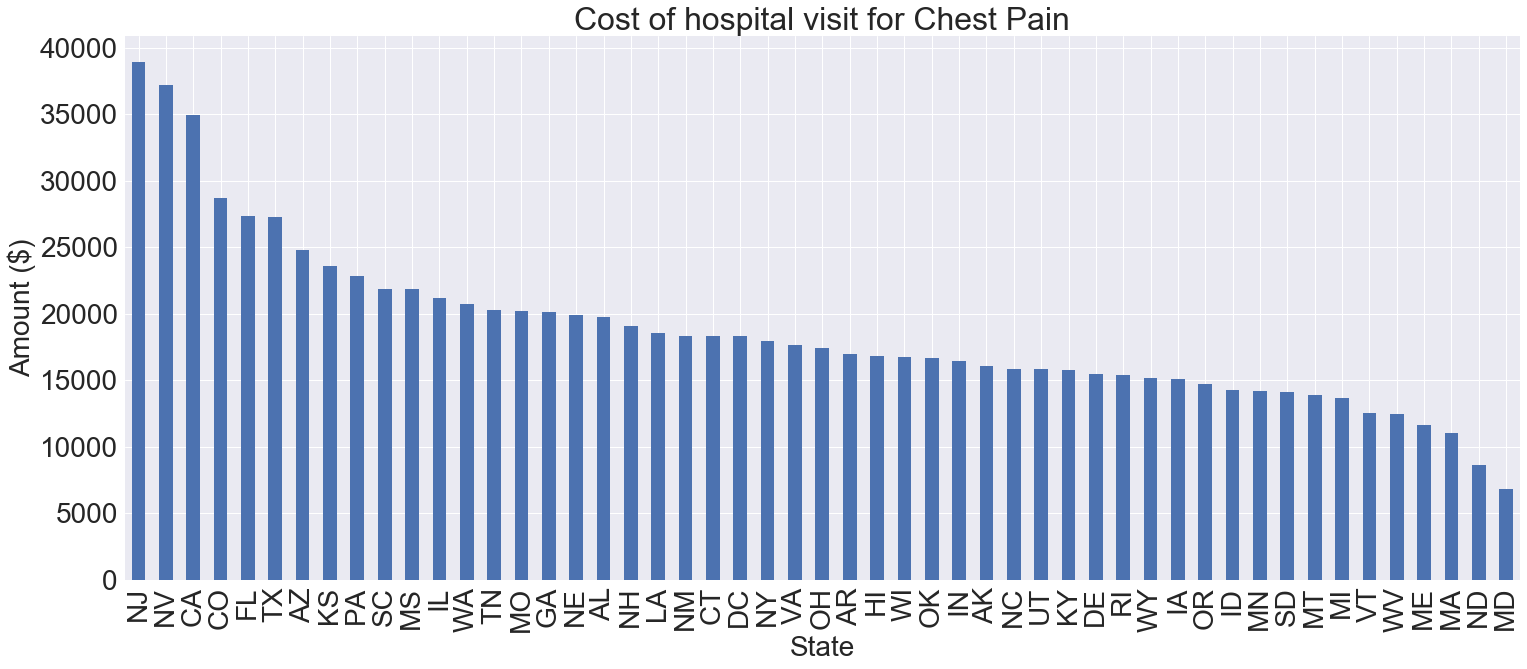

In [318]:
#my_plot = Chest_pain_by_state_mean[u'Average_Covered_Charges'].plot(kind='bar')

my_plot = Chest_pain_by_state_mean[u'Average_Covered_Charges'].plot(kind='bar', fontsize=28, figsize=(25,10),legend=None)
#my_plot.set_fontsize(20)
my_plot.set_xlabel("State",fontsize=28)
my_plot.set_ylabel("Amount ($)", fontsize=28)
my_plot.set_title("Cost of hospital visit for Chest Pain", fontsize=32)


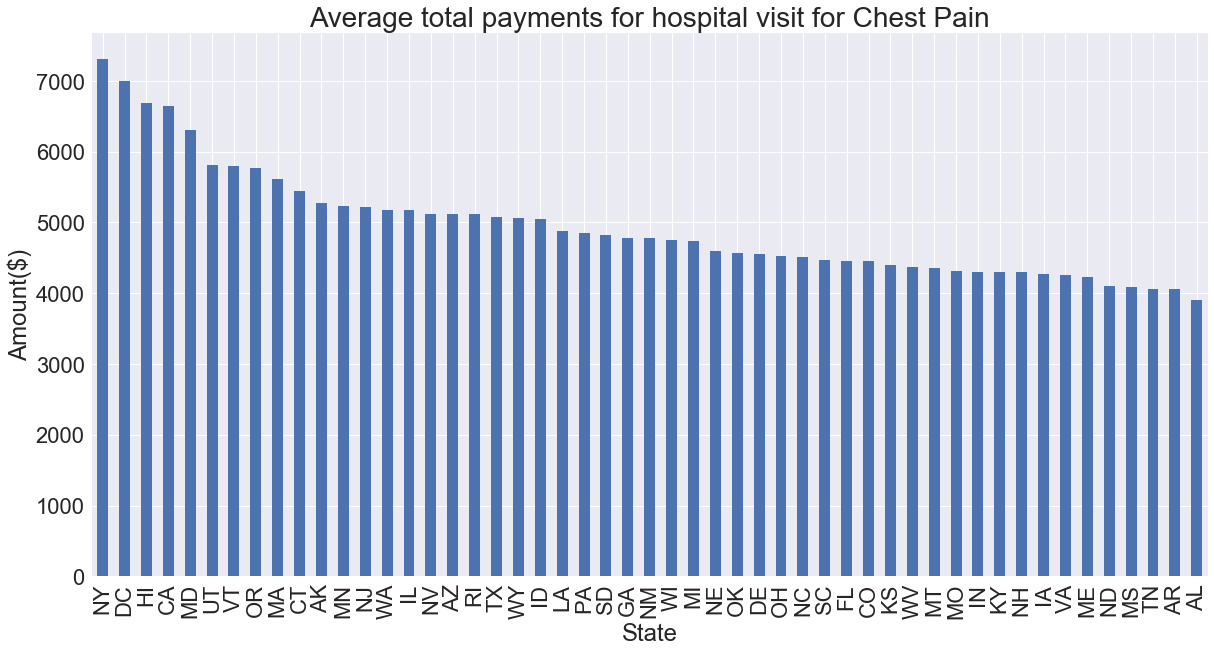

In [177]:
#my_plot = Chest_pain_by_state_mean[u'Average_Covered_Charges'].plot(kind='bar')
Chest_pain_by_state_mean = Chest_pain_by_state_mean.sort_values(by=u'Average_Total_Payments',ascending=False)
my_plot = Chest_pain_by_state_mean[u'Average_Total_Payments'].plot(kind='bar', fontsize=22, figsize=(20,10),legend=None)
#my_plot.set_fontsize(20)
my_plot.set_xlabel("State",fontsize=24)
my_plot.set_ylabel("Amount($)", fontsize=24)
my_plot.set_title("Average total payments for hospital visit for Chest Pain", fontsize=28)

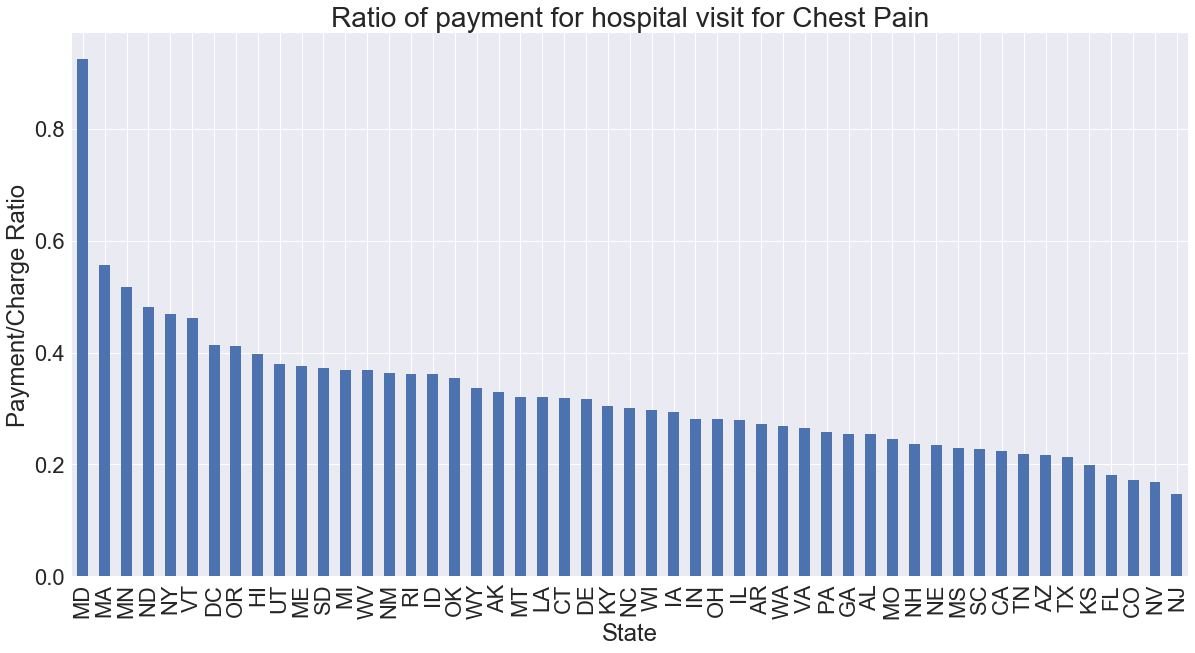

In [178]:
#my_plot = Chest_pain_by_state_mean[u'Average_Covered_Charges'].plot(kind='bar')
Chest_pain_by_state_mean = Chest_pain_by_state_mean.sort_values(by='Payment_Ratio',ascending=False)
my_plot = Chest_pain_by_state_mean['Payment_Ratio'].plot(kind='bar', fontsize=22, figsize=(20,10),legend=None)
#my_plot.set_fontsize(20)
my_plot.set_xlabel("State",fontsize=24)
my_plot.set_ylabel("Payment/Charge Ratio", fontsize=24)
my_plot.set_title("Ratio of payment for hospital visit for Chest Pain", fontsize=28)

In [179]:
Chest_pain_by_state.head()

,Average_Covered_Charges,Average_Total_Payments,DRG_Definition,Provider_City,Provider_State,Provider_Zip_Code,Service_type,Hospital_Type,Hospital_Ownership,Emergency_Services,...,Percent_hispanic_or_latino,Percent_Male,Percent_Occupied_Housing_Units_y,Percent_white,Rental_vacancy_rate,Homeowner_vacancy_rate,Average_family_size,Median_income_zip,Zip_population,Payment_Ratio
93718,24478.609760,3976.707317,313 - CHEST PAIN,DOTHAN,AL,36301,0,Acute Care Hospitals,Government - Hospital District or Authority,True,...,2.9,48.0,90.4,70.0,9.8,2.4,2.96,38007.8711,35759.0,0.162456
93719,13127.153850,3613.923077,313 - CHEST PAIN,BOAZ,AL,35957,0,Acute Care Hospitals,Government - Hospital District or Authority,True,...,12.1,49.3,88.8,87.6,8.6,2.5,3.05,33993.3607,15693.0,0.275301
93720,18011.276600,3465.255319,313 - CHEST PAIN,FLORENCE,AL,35631,0,Acute Care Hospitals,Government - Hospital District or Authority,True,...,2.2,47.9,88.3,86.4,9.3,2.1,2.89,NaN,NaN,0.192394
93721,22181.200000,3998.900000,313 - CHEST PAIN,BIRMINGHAM,AL,35235,0,Acute Care Hospitals,Voluntary non-profit - Private,True,...,3.9,47.4,87.7,53.0,13.3,3.4,3.05,54491.2802,19484.0,0.180283
93722,21529.266670,3869.533333,313 - CHEST PAIN,ALABASTER,AL,35007,0,Acute Care Hospitals,Voluntary non-profit - Private,True,...,5.9,49.0,91.5,83.0,12.6,2.7,3.08,66251.0796,26225.0,0.179734
93756,16053.875000,5277.750000,313 - CHEST PAIN,SOLDOTNA,AK,99669,0,Acute Care Hospitals,Voluntary non-profit - Other,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59493.8604,14191.0,0.328752
93757,23823.071430,9797.285714,313 - CHEST PAIN,PHOENIX,AZ,85031,0,Acute Care Hospitals,Proprietary,True,...,29.6,49.5,86.1,73.0,13.7,4.1,3.25,34265.3885,30493.0,0.411252
93758,23565.352940,6376.117647,313 - CHEST PAIN,PHOENIX,AZ,85006,0,Acute Care Hospitals,Voluntary non-profit - Other,True,...,29.6,49.5,86.1,73.0,13.7,4.1,3.25,21619.8741,25742.0,0.270572
93759,17637.096770,5283.225806,313 - CHEST PAIN,TUCSON,AZ,85712,0,Acute Care Hospitals,Voluntary non-profit - Private,True,...,34.6,49.1,88.1,74.3,11.2,2.9,3.06,34312.2828,32666.0,0.299552
93760,26989.857140,4269.214286,313 - CHEST PAIN,TUCSON,AZ,85745,0,Acute Care Hospitals,Voluntary non-profit - Private,True,...,34.6,49.1,88.1,74.3,11.2,2.9,3.06,47470.9431,37006.0,0.158178


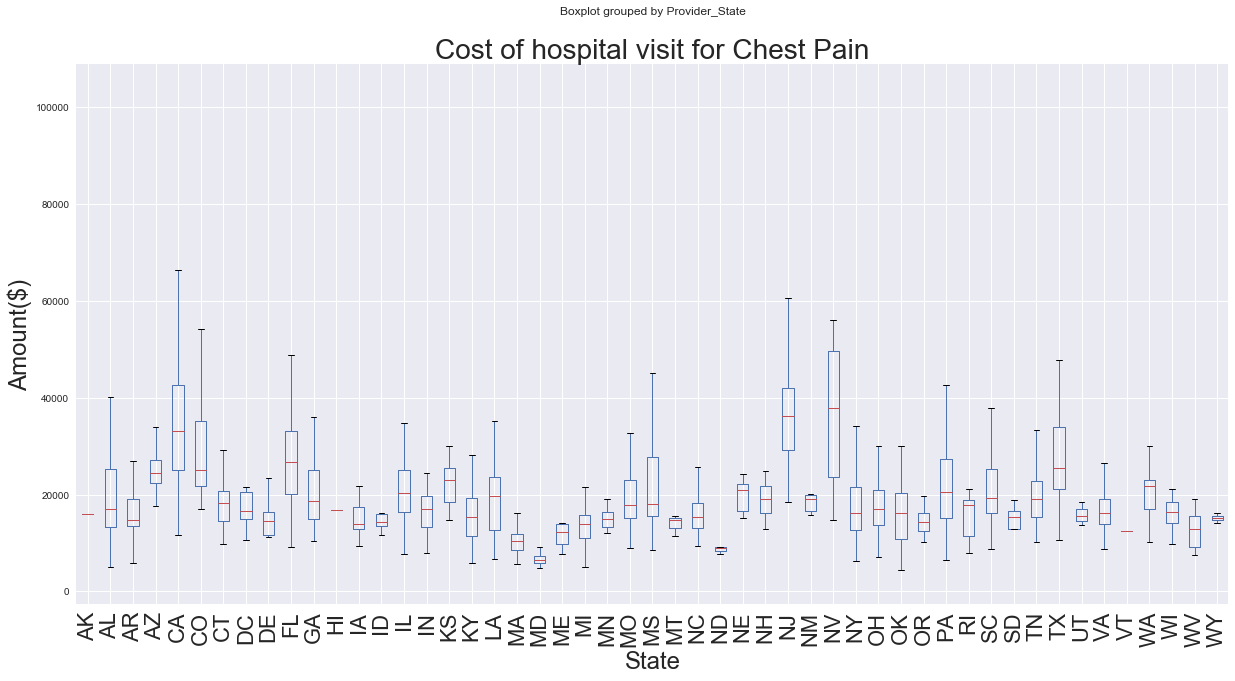

In [182]:
my_plot = df_Plot_1a_chest_pain.boxplot(column = 'Average_Covered_Charges', by='Provider_State', fontsize=22, rot = 90, figsize=(20,10))


my_plot.set_xlabel("State",fontsize=24)
my_plot.set_ylabel("Amount($)", fontsize=24)
my_plot.set_title("Cost of hospital visit for Chest Pain", fontsize=28)

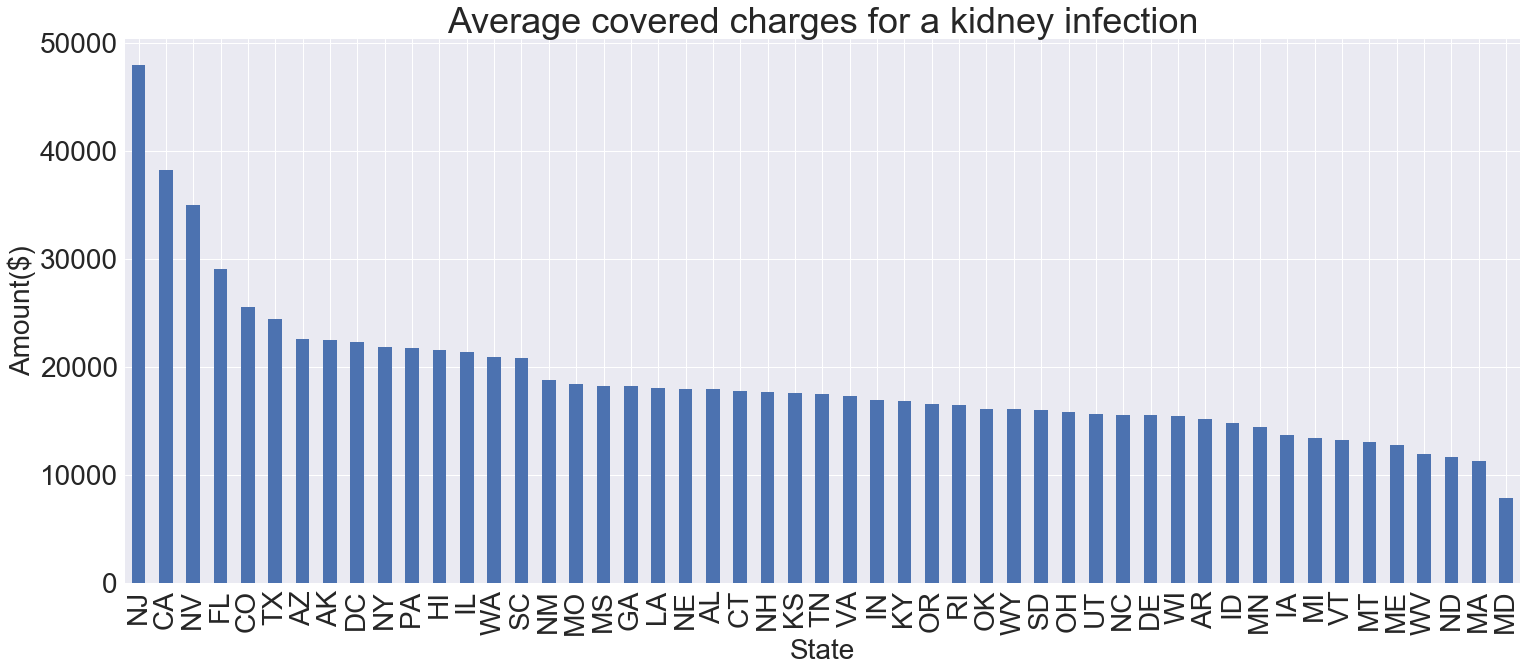

In [320]:
column_name = '690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC'

df_column = df_Plot_1a[df_Plot_1a.DRG_Definition == column_name]
column_by_state = df_column.groupby(['Provider_State'])
column_by_state_mean = column_by_state.mean()
column_by_state_mean = column_by_state_mean.sort_values(by='Average_Covered_Charges',ascending=False)

my_plot = column_by_state_mean[u'Average_Covered_Charges'].plot(kind='bar', fontsize=28, figsize=(25,10),legend=None)

my_plot.set_xlabel("State",fontsize=28)
my_plot.set_ylabel("Amount($)", fontsize=28)
my_plot.set_title('Average covered charges for a kidney infection', fontsize=36)



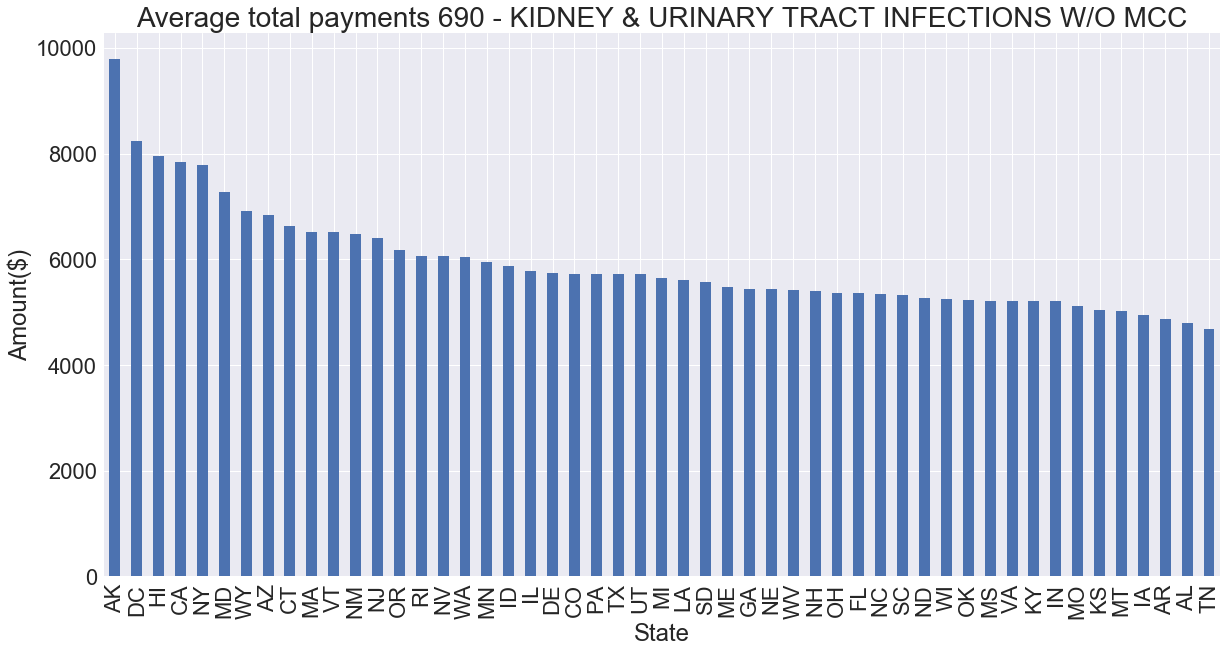

In [184]:
column_by_state_mean = column_by_state_mean.sort_values(by=u'Average_Total_Payments',ascending=False)
my_plot_2 = column_by_state_mean[u'Average_Total_Payments'].plot(kind='bar', fontsize=22, figsize=(20,10),legend=None)
my_plot_2.set_xlabel("State",fontsize=24)
my_plot_2.set_ylabel("Amount($)", fontsize=24)
my_plot_2.set_title("Average total payments " + column_name, fontsize=28)




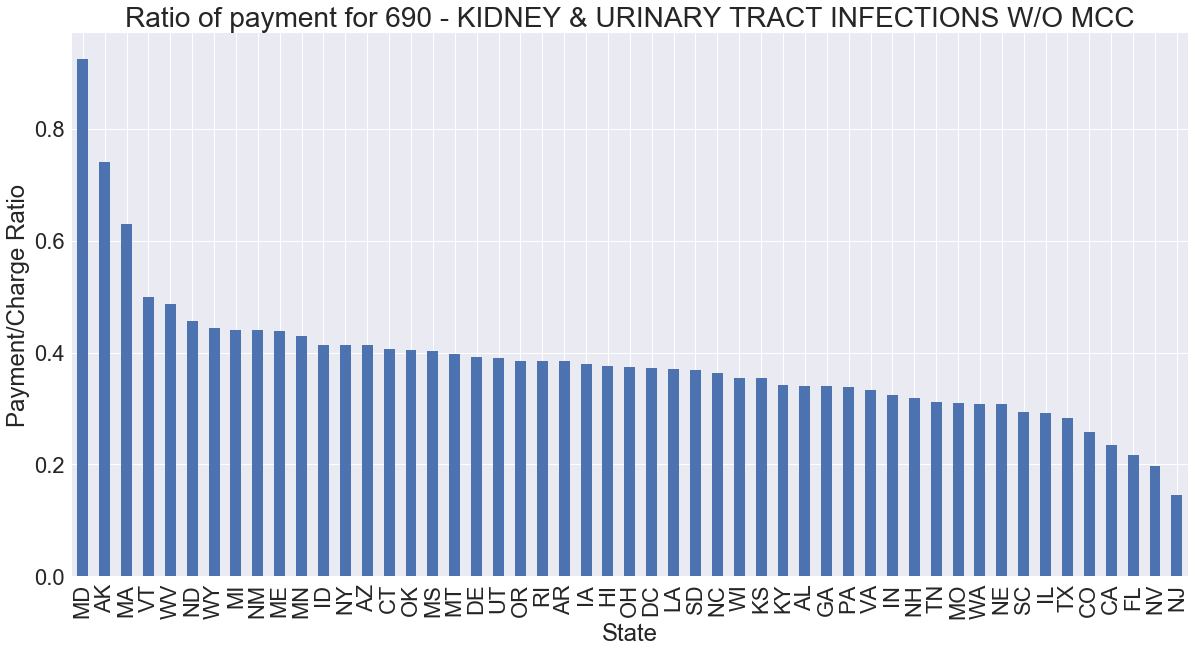

In [185]:
column_by_state_mean = column_by_state_mean.sort_values(by='Payment_Ratio',ascending=False)
my_plot_3 = column_by_state_mean['Payment_Ratio'].plot(kind='bar', fontsize=24, figsize=(20,10),legend=None)
my_plot_3.set_xlabel("State",fontsize=24)
my_plot_3.set_ylabel("Payment/Charge Ratio", fontsize=24)
my_plot_3.set_title("Ratio of payment for " + column_name, fontsize=28)


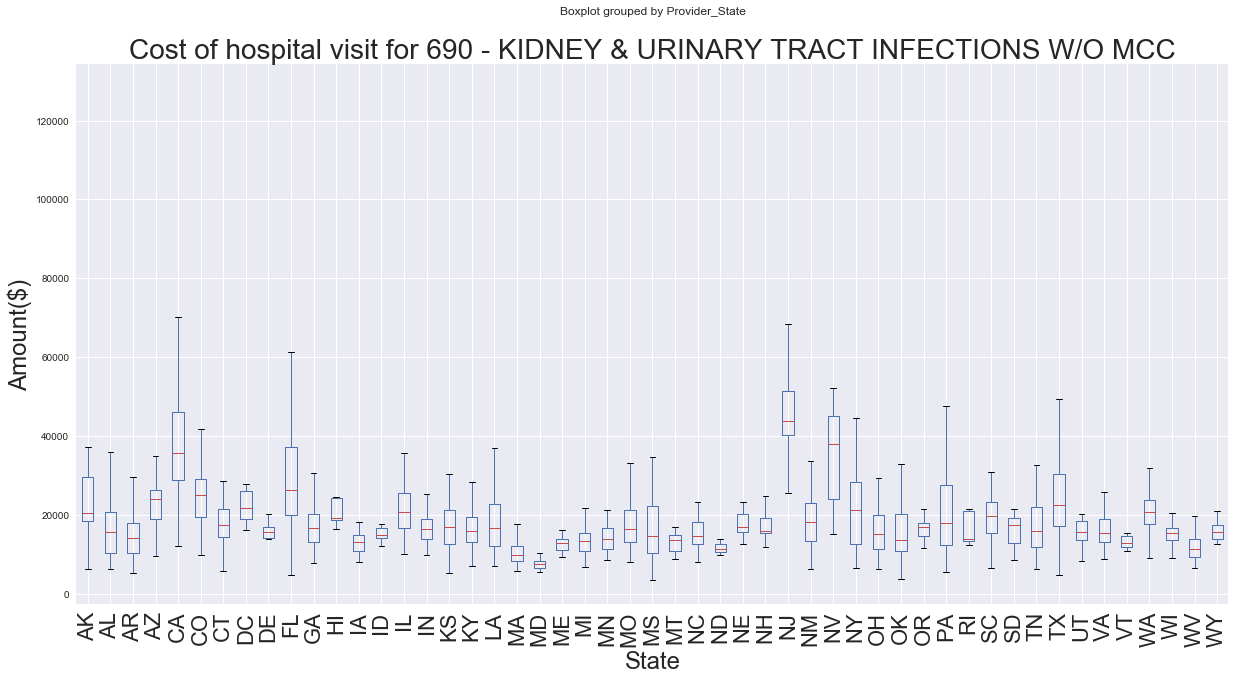

In [186]:
my_plot_4 = df_column.boxplot(column = 'Average_Covered_Charges', by='Provider_State', fontsize=22, rot = 90, figsize=(20,10))
my_plot_4.set_xlabel("State",fontsize=24)
my_plot_4.set_ylabel("Amount($)", fontsize=24)
my_plot_4.set_title("Cost of hospital visit for " +  column_name, fontsize=28)

In [187]:
df_Plot_1a_UTI = df_Plot_1a[df_Plot_1a.DRG_Definition == '690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC']
UTI_by_state = df_Plot_1a_UTI.groupby(['Provider_State'])
UTI_by_state_mean = UTI_by_state.mean()
UTI_by_state_mean = UTI_by_state_mean.sort_values(by='Average_Covered_Charges',ascending=False)

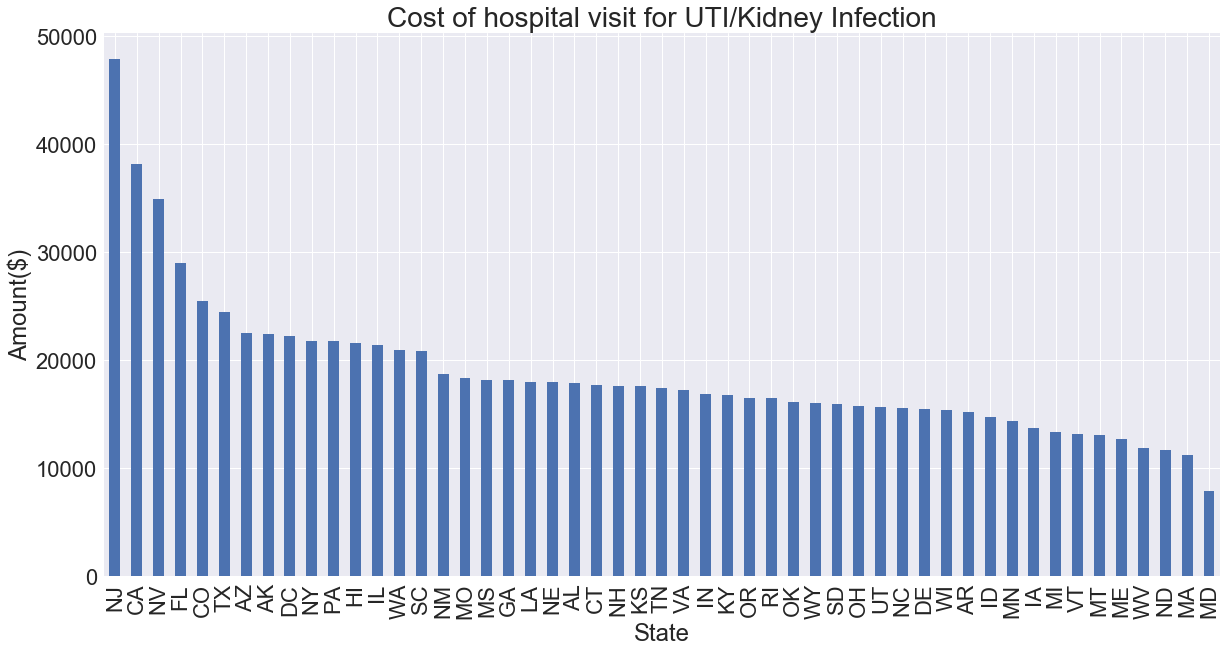

In [188]:

my_plot = UTI_by_state_mean[u'Average_Covered_Charges'].plot(kind='bar', fontsize=22, figsize=(20,10),legend=None)
#my_plot.set_fontsize(20)
my_plot.set_xlabel("State",fontsize=24)
my_plot.set_ylabel("Amount($)", fontsize=24)
my_plot.set_title("Cost of hospital visit for UTI/Kidney Infection", fontsize=28)

In [321]:
df_Plot_1a_pneum = df_Plot_1a[df_Plot_1a.DRG_Definition == '195 - SIMPLE PNEUMONIA & PLEURISY W/O CC/MCC']
pneum_by_state = df_Plot_1a_pneum.groupby(['Provider_State'])
pneum_by_state_mean = pneum_by_state.mean()
pneum_by_state_mean = pneum_by_state_mean.sort_values(by='Average_Covered_Charges',ascending=False)



#195 - SIMPLE PNEUMONIA & PLEURISY W/O CC/MCC 

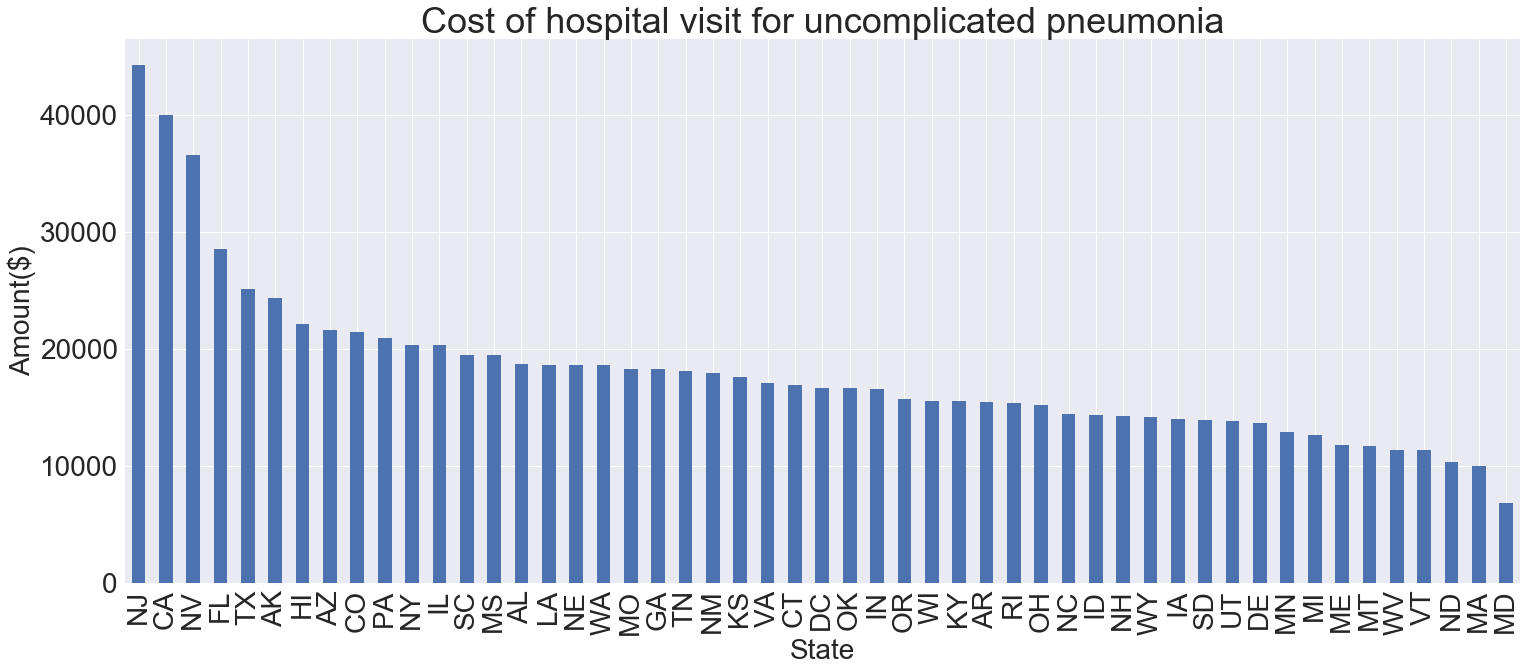

In [322]:

my_plot = pneum_by_state_mean[u'Average_Covered_Charges'].plot(kind='bar', fontsize=28, figsize=(25,10),legend=None)
#my_plot.set_fontsize(20)
my_plot.set_xlabel("State",fontsize=28)
my_plot.set_ylabel("Amount($)", fontsize=28)
my_plot.set_title("Cost of hospital visit for uncomplicated pneumonia", fontsize=36)

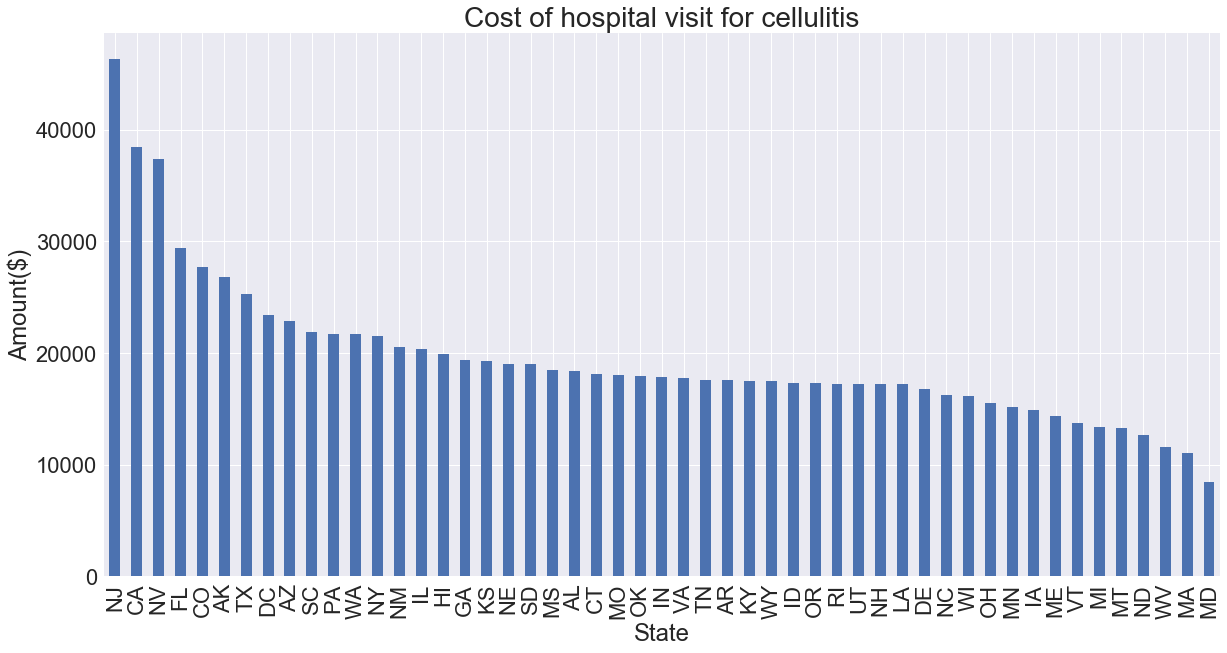

In [191]:
df_Plot_1a_cellulitis = df_Plot_1a[df_Plot_1a.DRG_Definition == '603 - CELLULITIS W/O MCC']
cellulitis_by_state = df_Plot_1a_cellulitis.groupby(['Provider_State'])
cellulitis_by_state_mean = cellulitis_by_state.mean()
cellulitis_by_state_mean = cellulitis_by_state_mean.sort_values(by='Average_Covered_Charges',ascending=False)

my_plot = cellulitis_by_state_mean[u'Average_Covered_Charges'].plot(kind='bar', fontsize=22, figsize=(20,10),legend=None)
#my_plot.set_fontsize(20)
my_plot.set_xlabel("State",fontsize=24)
my_plot.set_ylabel("Amount($)", fontsize=24)
my_plot.set_title("Cost of hospital visit for cellulitis", fontsize=28)

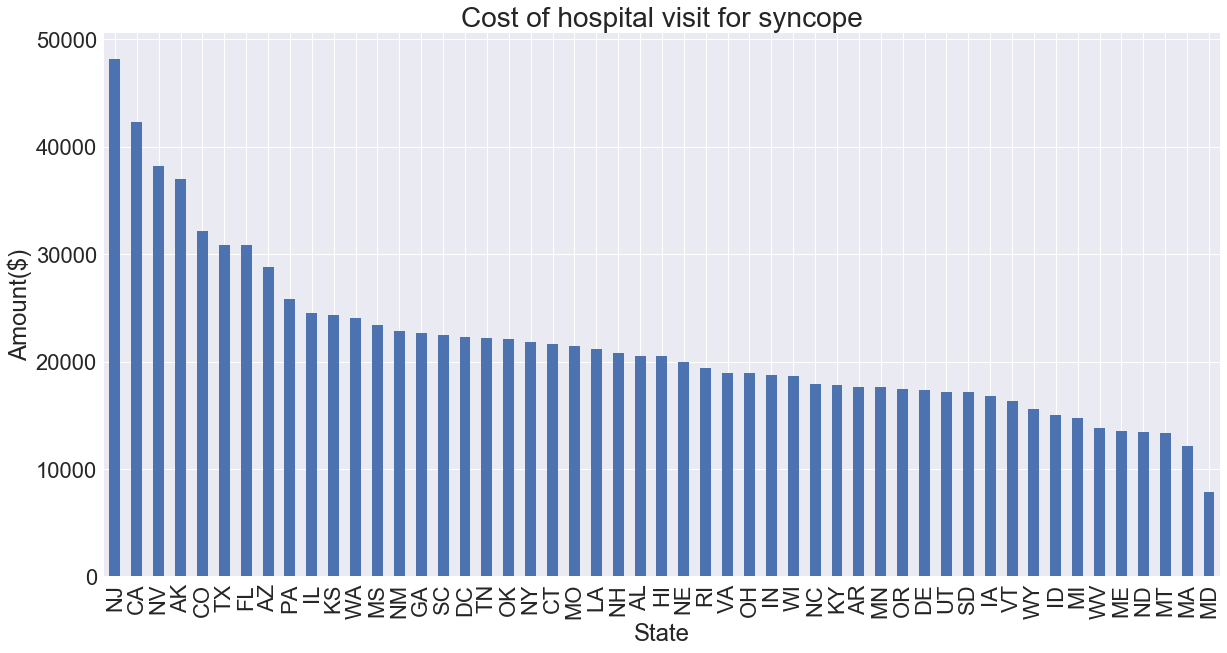

In [192]:
df_Plot_1a_syncope = df_Plot_1a[df_Plot_1a.DRG_Definition == '312 - SYNCOPE & COLLAPSE']
syncope_by_state = df_Plot_1a_syncope.groupby(['Provider_State'])
syncope_by_state_mean = syncope_by_state.mean()
syncope_by_state_mean = syncope_by_state_mean.sort_values(by='Average_Covered_Charges',ascending=False)

my_plot = syncope_by_state_mean[u'Average_Covered_Charges'].plot(kind='bar', fontsize=22, figsize=(20,10),legend=None)
#my_plot.set_fontsize(20)
my_plot.set_xlabel("State",fontsize=24)
my_plot.set_ylabel("Amount($)", fontsize=24)
my_plot.set_title("Cost of hospital visit for syncope", fontsize=28)

#312 - SYNCOPE & COLLAPSE

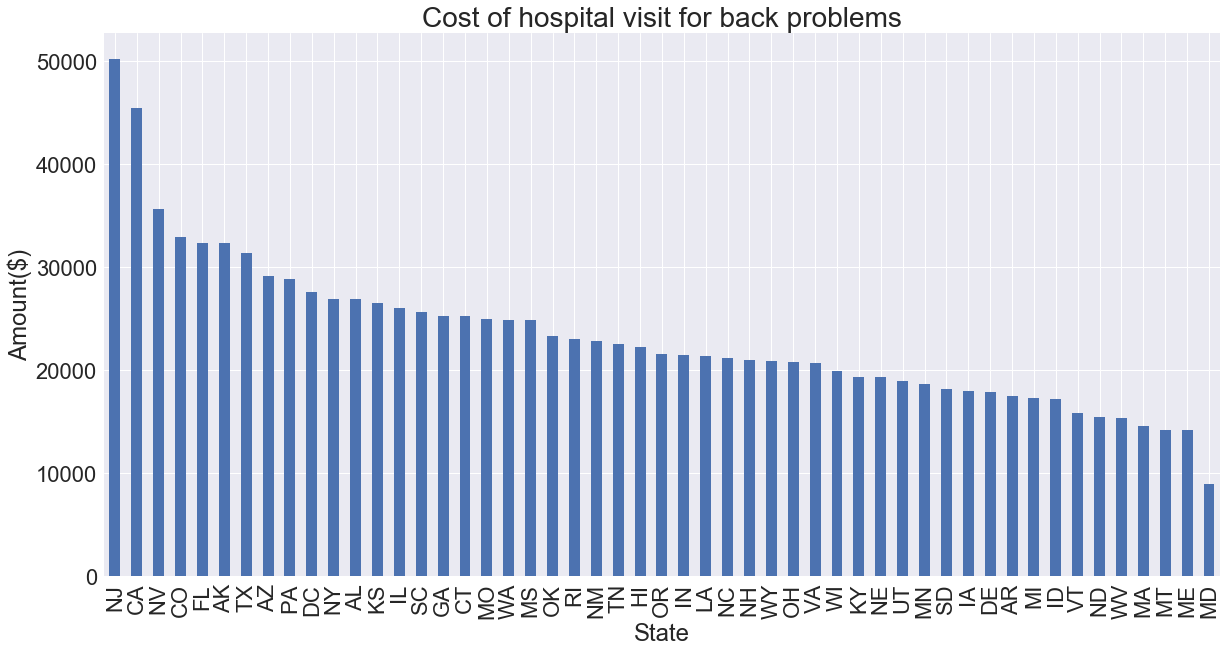

In [193]:
df_Plot_1a_Back = df_Plot_1a[df_Plot_1a.DRG_Definition == '552 - MEDICAL BACK PROBLEMS W/O MCC']
Back_by_state = df_Plot_1a_Back.groupby(['Provider_State'])
Back_by_state_mean = Back_by_state.mean()
Back_by_state_mean = Back_by_state_mean.sort_values(by='Average_Covered_Charges',ascending=False)

my_plot = Back_by_state_mean[u'Average_Covered_Charges'].plot(kind='bar', fontsize=22, figsize=(20,10),legend=None)
#my_plot.set_fontsize(20)
my_plot.set_xlabel("State",fontsize=24)
my_plot.set_ylabel("Amount($)", fontsize=24)
my_plot.set_title("Cost of hospital visit for back problems", fontsize=28)

#312 - SYNCOPE & COLLAPSE

#552 - MEDICAL BACK PROBLEMS W/O MCC

In [194]:
df_Plot_1b = df_Plot_1b[df_Plot_1b.DRG_Definition_count >= 500]

In [195]:
df_Plot_1b['DRG_Definition'].value_counts()

0267 - Level III Diagnostic and Screening Ultrasound                                     2924
0269 - Level II Echocardiogram Without Contrast                                          2847
0265 - Level I Diagnostic and Screening Ultrasound                                       2664
0377 - Level II Cardiac Imaging                                                          2543
0634 - Hospital Clinic Visits                                                            2514
0013 - Level II Debridement & Destruction                                                2171
0336 - Magnetic Resonance Imaging and Magnetic Resonance Angiography without Contrast    2095
0207 - Level III Nerve Injections                                                        1980
0096 - Level II Noninvasive Physiologic Studies                                          1841
0204 - Level I Nerve Injections                                                          1784
0015 - Level III Debridement & Destruction                  

In [196]:
df_Plot_1b_angiograph = df_Plot_1b[df_Plot_1b.DRG_Definition == '0336 - Magnetic Resonance Imaging and Magnetic Resonance Angiography without Contrast']

In [197]:
df_Plot_1b_angiograph.groupby(['Provider_State']).mean()

,Average_Covered_Charges,Average_Total_Payments,Provider_Zip_Code,Average_Covered_Charges_mean_ST_3_bins,Average_Covered_Charges_median_3_bins,Average_Covered_Charges_median_ST_3_bins,log_Average_Covered_Charges_mean_3_bins,log_Average_Covered_Charges_median_3_bins,log_Average_Covered_Charges_median_ST_3_bins,DRG_Definition_count,...,Percent_hispanic_or_latino,Percent_Male,Percent_Occupied_Housing_Units_y,Percent_white,Rental_vacancy_rate,Homeowner_vacancy_rate,Average_family_size,Median_income_zip,Zip_population,Payment_Ratio
Provider_State,,,,,,,,,,,,,,,,,,,,,
AK,2292.777940,377.616357,99670.000000,1.000000,0.666667,1.000000,0.666667,0.666667,1.0,2095.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60507.931333,28013.333333,0.172236
AL,3026.833532,257.936952,35920.436364,0.945455,1.072727,0.945455,1.072727,1.072727,1.0,2095.0,...,3.015094,48.486792,85.307547,69.058491,12.196226,2.564151,2.996038,38180.861563,19060.450980,0.106952
AR,2278.464766,267.455584,72320.111111,0.972222,0.666667,0.972222,0.694444,0.638889,1.0,2095.0,...,6.382353,48.820588,88.082353,75.676471,10.538235,2.323529,2.997353,39820.767642,24766.580645,0.144639
AZ,2998.106915,340.752943,85484.115385,1.000000,1.230769,1.000000,1.269231,1.230769,1.0,2095.0,...,26.930769,49.911538,81.815385,74.134615,12.807692,4.057692,3.182308,53197.610312,32867.730769,0.130987
CA,3768.377881,382.049959,93215.738462,0.984615,1.530769,0.984615,1.569231,1.484615,1.0,2095.0,...,36.877778,49.785714,91.913492,59.348413,6.303175,2.123810,3.417619,59865.947762,38900.524590,0.116236
CO,3035.065641,301.280749,80756.153846,0.923077,1.115385,0.923077,1.115385,1.115385,1.0,2095.0,...,23.450000,50.734615,86.734615,81.884615,9.142308,2.719231,3.055385,50849.670372,23386.120000,0.117887
CT,2502.244059,377.289731,6469.800000,1.050000,0.900000,1.050000,0.900000,0.850000,1.0,2095.0,...,12.500000,48.765000,91.735000,79.300000,8.285000,1.710000,3.077000,61517.646425,28912.750000,0.169451
DC,2486.790217,304.916023,20025.571429,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,2095.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67393.900800,24534.000000,0.126318
DE,1856.523628,313.133295,19887.500000,1.000000,0.000000,1.000000,0.000000,0.000000,1.0,2095.0,...,7.925000,48.525000,78.625000,72.825000,12.100000,2.925000,2.995000,49874.241433,26181.000000,0.174245


In [198]:
df_Plot_1b_angiograph[df_Plot_1b_angiograph['Provider_State'] == 'FL']

,Average_Covered_Charges,Average_Total_Payments,DRG_Definition,Provider_City,Provider_State,Provider_Zip_Code,Service_type,Hospital_Type,Hospital_Ownership,Emergency_Services,...,Percent_hispanic_or_latino,Percent_Male,Percent_Occupied_Housing_Units_y,Percent_white,Rental_vacancy_rate,Homeowner_vacancy_rate,Average_family_size,Median_income_zip,Zip_population,Payment_Ratio
227342,2848.189189,295.981351,0336 - Magnetic Resonance Imaging and Magnetic...,BELLE GLADE,FL,33430,1,Acute Care Hospitals,Government - Hospital District or Authority,True,...,19.0,48.4,81.9,73.5,12.3,3.4,2.97,26742.7110,16771.0,0.103919
227344,3955.718889,294.006245,0336 - Magnetic Resonance Imaging and Magnetic...,TAMPA,FL,33606,1,Acute Care Hospitals,Voluntary non-profit - Private,True,...,24.9,48.7,88.4,71.3,12.5,3.2,3.11,59361.0799,17746.0,0.074324
227345,2939.874354,276.310383,0336 - Magnetic Resonance Imaging and Magnetic...,CLEARWATER,FL,33756,1,Acute Care Hospitals,Voluntary non-profit - Private,True,...,8.0,48.0,82.6,82.1,13.2,3.6,2.79,40570.8157,31275.0,0.093987
227348,6626.011308,279.112196,0336 - Magnetic Resonance Imaging and Magnetic...,SAINT PETERSBUR,FL,33707,1,Acute Care Hospitals,Proprietary,True,...,8.0,48.0,82.6,82.1,13.2,3.6,2.79,44929.0869,24599.0,0.042124
227351,5297.436444,262.596667,0336 - Magnetic Resonance Imaging and Magnetic...,BARTOW,FL,33831,1,Acute Care Hospitals,Proprietary,True,...,17.7,49.0,80.9,75.2,15.7,4.3,3.05,NaN,NaN,0.049571
227355,1532.019300,293.427666,0336 - Magnetic Resonance Imaging and Magnetic...,GAINESVILLE,FL,32610,1,Acute Care Hospitals,Voluntary non-profit - Private,True,...,8.4,48.4,89.1,69.6,12.4,3.1,2.91,NaN,NaN,0.191530
227358,3983.298843,275.775682,0336 - Magnetic Resonance Imaging and Magnetic...,JACKSONVILLE,FL,32207,1,Acute Care Hospitals,Voluntary non-profit - Private,True,...,7.6,48.5,88.1,60.9,13.6,3.4,3.04,43303.6954,33306.0,0.069233
227359,4247.441459,263.223520,0336 - Magnetic Resonance Imaging and Magnetic...,SEBRING,FL,33871,1,Acute Care Hospitals,Voluntary non-profit - Church,True,...,17.4,48.9,76.9,81.0,17.1,4.6,2.74,NaN,NaN,0.061972
227361,1607.220328,296.547190,0336 - Magnetic Resonance Imaging and Magnetic...,VERO BEACH,FL,32960,1,Acute Care Hospitals,Government - Hospital District or Authority,True,...,11.2,48.4,78.8,84.3,17.3,4.8,2.77,38036.9340,20037.0,0.184509
227363,8437.122806,260.625000,0336 - Magnetic Resonance Imaging and Magnetic...,LAKE WALES,FL,33853,1,Acute Care Hospitals,Proprietary,True,...,17.7,49.0,80.9,75.2,15.7,4.3,3.05,31920.4384,11161.0,0.030890


In [199]:
#df_Plot_1b_pneum = df_Plot_1b[df_Plot_1b.DRG_Definition == '195 - SIMPLE PNEUMONIA & PLEURISY W/O CC/MCC']
angiograph_by_state = df_Plot_1b_angiograph.groupby(['Provider_State'])
angiograph_by_state_mean = angiograph_by_state.mean()
angiograph_by_state_mean = angiograph_by_state_mean.sort_values(by='Average_Covered_Charges',ascending=False)



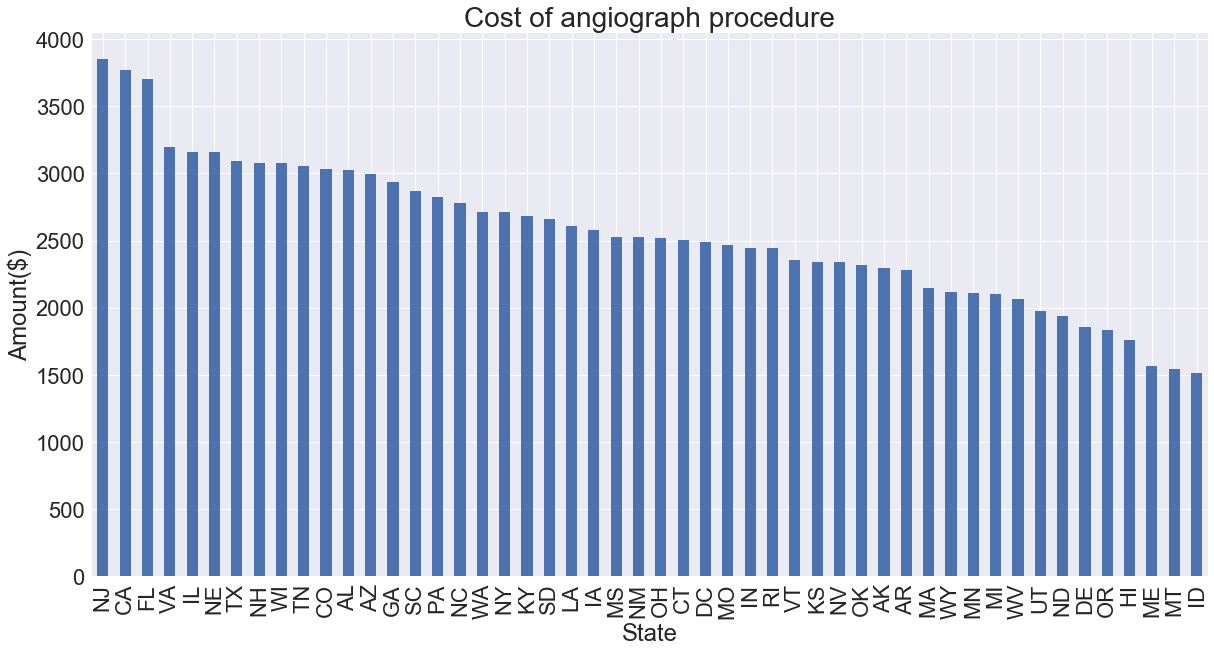

In [200]:

my_plot = angiograph_by_state_mean[u'Average_Covered_Charges'].plot(kind='bar', fontsize=22, figsize=(20,10),legend=None)
#my_plot.set_fontsize(20)
my_plot.set_xlabel("State",fontsize=24)
my_plot.set_ylabel("Amount($)", fontsize=24)
my_plot.set_title("Cost of angiograph procedure", fontsize=28)

In [201]:
df_Plot_1b_echo = df_Plot_1b[df_Plot_1b.DRG_Definition == '0269 - Level II Echocardiogram Without Contrast']
echo_by_state = df_Plot_1b_echo.groupby(['Provider_State'])
echo_by_state_mean = echo_by_state.mean()
echo_by_state_mean = echo_by_state_mean.sort_values(by='Average_Covered_Charges',ascending=False)


#0269 - Level II Echocardiogram Without Contrast

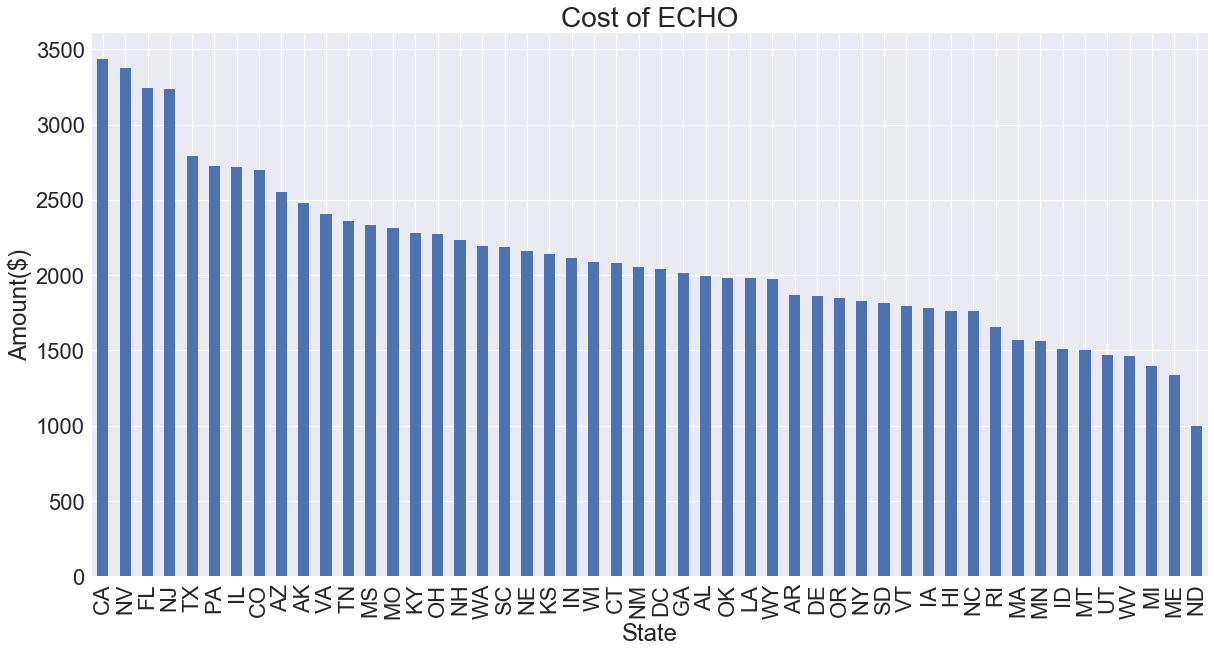

In [202]:

my_plot = echo_by_state_mean[u'Average_Covered_Charges'].plot(kind='bar', fontsize=22, figsize=(20,10),legend=None)
#my_plot.set_fontsize(20)
my_plot.set_xlabel("State",fontsize=24)
my_plot.set_ylabel("Amount($)", fontsize=24)
my_plot.set_title("Cost of ECHO", fontsize=28)

In [323]:
df_Plot_1b_L1ultrasound = df_Plot_1b[df_Plot_1b.DRG_Definition == '0265 - Level I Diagnostic and Screening Ultrasound']
L1ultrasound_by_state = df_Plot_1b_L1ultrasound.groupby(['Provider_State'])
L1ultrasound_by_state_mean = L1ultrasound_by_state.mean()
L1ultrasound_by_state_mean = L1ultrasound_by_state_mean.sort_values(by='Average_Covered_Charges',ascending=False)



#Level I Diagnostic and Screening Ultrasound

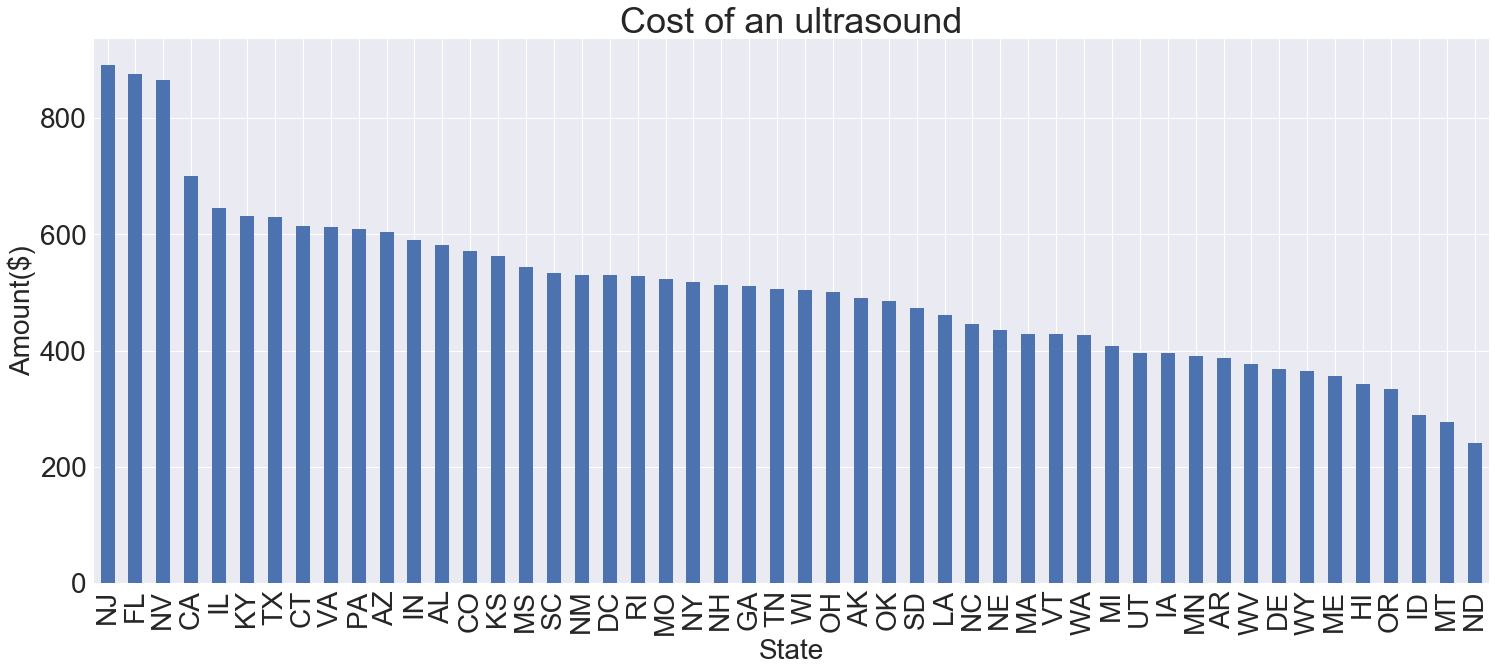

In [324]:
my_plot = L1ultrasound_by_state_mean[u'Average_Covered_Charges'].plot(kind='bar', fontsize=28, figsize=(25,10),legend=None)
#my_plot.set_fontsize(20)
my_plot.set_xlabel("State",fontsize=28)
my_plot.set_ylabel("Amount($)", fontsize=28)
my_plot.set_title("Cost of an ultrasound", fontsize=36)

In [205]:
#0020 - Level II Excision/ Biopsy 

df_Plot_1b_biopsy = df_Plot_1b[df_Plot_1b.DRG_Definition == '0020 - Level II Excision/ Biopsy']
biopsy_by_state = df_Plot_1b_biopsy.groupby(['Provider_State'])
biopsy_by_state_mean = biopsy_by_state.mean()
biopsy_by_state_mean = biopsy_by_state_mean.sort_values(by='Average_Covered_Charges',ascending=False)



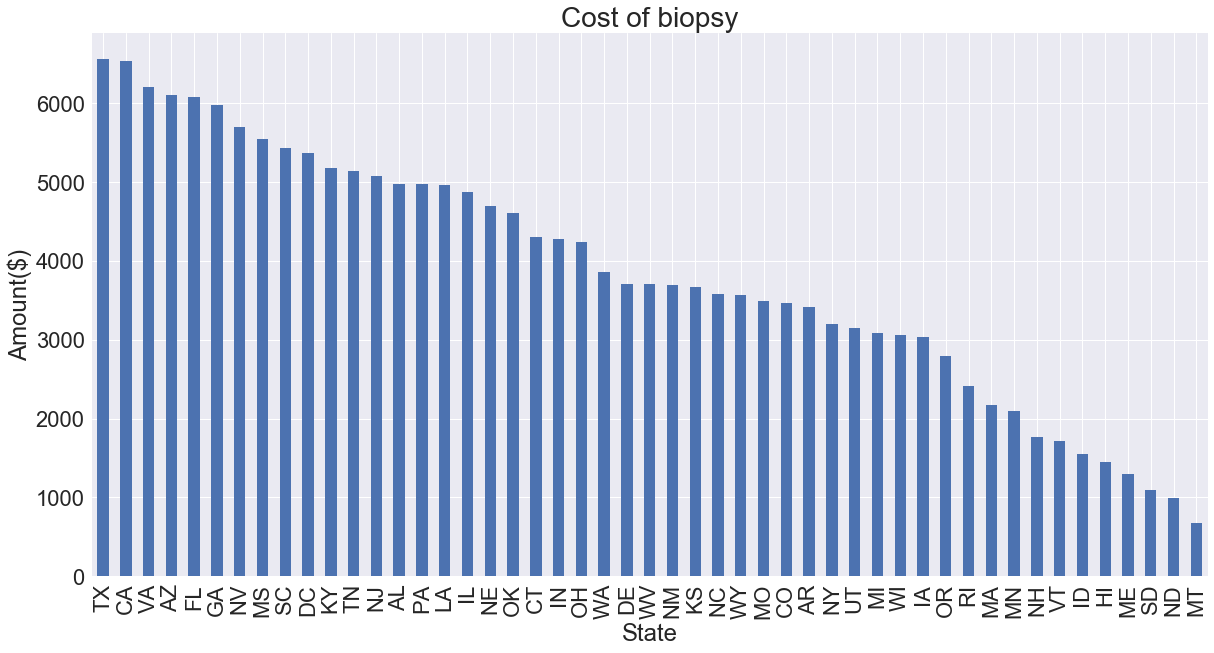

In [206]:
my_plot = biopsy_by_state_mean[u'Average_Covered_Charges'].plot(kind='bar', fontsize=22, figsize=(20,10),legend=None)
#my_plot.set_fontsize(20)
my_plot.set_xlabel("State",fontsize=24)
my_plot.set_ylabel("Amount($)", fontsize=24)
my_plot.set_title("Cost of biopsy", fontsize=28)

Try to make a US map with average cost of chest pain admission:

In [334]:
Chest_pain_by_state.head()

,Average_Covered_Charges,Average_Total_Payments,DRG_Definition,Provider_City,Provider_State,Provider_Zip_Code,Service_type,Hospital_Type,Hospital_Ownership,Emergency_Services,...,Percent_hispanic_or_latino,Percent_Male,Percent_Occupied_Housing_Units_y,Percent_white,Rental_vacancy_rate,Homeowner_vacancy_rate,Average_family_size,Median_income_zip,Zip_population,Payment_Ratio
93718,24478.609760,3976.707317,313 - CHEST PAIN,DOTHAN,AL,36301,0,Acute Care Hospitals,Government - Hospital District or Authority,True,...,2.9,48.0,90.4,70.0,9.8,2.4,2.96,38007.8711,35759.0,0.162456
93719,13127.153850,3613.923077,313 - CHEST PAIN,BOAZ,AL,35957,0,Acute Care Hospitals,Government - Hospital District or Authority,True,...,12.1,49.3,88.8,87.6,8.6,2.5,3.05,33993.3607,15693.0,0.275301
93720,18011.276600,3465.255319,313 - CHEST PAIN,FLORENCE,AL,35631,0,Acute Care Hospitals,Government - Hospital District or Authority,True,...,2.2,47.9,88.3,86.4,9.3,2.1,2.89,NaN,NaN,0.192394
93721,22181.200000,3998.900000,313 - CHEST PAIN,BIRMINGHAM,AL,35235,0,Acute Care Hospitals,Voluntary non-profit - Private,True,...,3.9,47.4,87.7,53.0,13.3,3.4,3.05,54491.2802,19484.0,0.180283
93722,21529.266670,3869.533333,313 - CHEST PAIN,ALABASTER,AL,35007,0,Acute Care Hospitals,Voluntary non-profit - Private,True,...,5.9,49.0,91.5,83.0,12.6,2.7,3.08,66251.0796,26225.0,0.179734
93756,16053.875000,5277.750000,313 - CHEST PAIN,SOLDOTNA,AK,99669,0,Acute Care Hospitals,Voluntary non-profit - Other,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59493.8604,14191.0,0.328752
93757,23823.071430,9797.285714,313 - CHEST PAIN,PHOENIX,AZ,85031,0,Acute Care Hospitals,Proprietary,True,...,29.6,49.5,86.1,73.0,13.7,4.1,3.25,34265.3885,30493.0,0.411252
93758,23565.352940,6376.117647,313 - CHEST PAIN,PHOENIX,AZ,85006,0,Acute Care Hospitals,Voluntary non-profit - Other,True,...,29.6,49.5,86.1,73.0,13.7,4.1,3.25,21619.8741,25742.0,0.270572
93759,17637.096770,5283.225806,313 - CHEST PAIN,TUCSON,AZ,85712,0,Acute Care Hospitals,Voluntary non-profit - Private,True,...,34.6,49.1,88.1,74.3,11.2,2.9,3.06,34312.2828,32666.0,0.299552
93760,26989.857140,4269.214286,313 - CHEST PAIN,TUCSON,AZ,85745,0,Acute Care Hospitals,Voluntary non-profit - Private,True,...,34.6,49.1,88.1,74.3,11.2,2.9,3.06,47470.9431,37006.0,0.158178


In [335]:
Chest_pain_by_state_mean_US_plot = Chest_pain_by_state_mean.copy()

In [336]:
Chest_pain_by_state_mean_US_plot.dtypes

Average_Covered_Charges                         float64
Average_Total_Payments                          float64
Provider_Zip_Code                               float64
Average_Covered_Charges_mean_ST_3_bins          float64
Average_Covered_Charges_median_3_bins           float64
Average_Covered_Charges_median_ST_3_bins        float64
log_Average_Covered_Charges_mean_3_bins         float64
log_Average_Covered_Charges_median_3_bins       float64
log_Average_Covered_Charges_median_ST_3_bins    float64
DRG_Definition_count                            float64
Median_Age                                      float64
Percent_Occupied_Housing_Units_x                float64
Percent_over_65                                 float64
Percent_Native_American                         float64
Percent_asian                                   float64
Percent Black or African American               float64
Percent_hispanic_or_latino                      float64
Percent_Male                                    

In [337]:
Chest_pain_by_state_mean_US_plot.columns

Index([u'Average_Covered_Charges', u'Average_Total_Payments',
       u'Provider_Zip_Code', u'Average_Covered_Charges_mean_ST_3_bins',
       u'Average_Covered_Charges_median_3_bins',
       u'Average_Covered_Charges_median_ST_3_bins',
       u'log_Average_Covered_Charges_mean_3_bins',
       u'log_Average_Covered_Charges_median_3_bins',
       u'log_Average_Covered_Charges_median_ST_3_bins',
       u'DRG_Definition_count', u'Median_Age',
       u'Percent_Occupied_Housing_Units_x', u'Percent_over_65',
       u'Percent_Native_American', u'Percent_asian',
       u'Percent Black or African American', u'Percent_hispanic_or_latino',
       u'Percent_Male', u'Percent_Occupied_Housing_Units_y', u'Percent_white',
       u'Rental_vacancy_rate', u'Homeowner_vacancy_rate',
       u'Average_family_size', u'Median_income_zip', u'Zip_population',
       u'Payment_Ratio'],
      dtype='object')

In [338]:
import math
#Chest_pain_by_state_mean_US_plot['log_Average_Covered_Charges_median_2_bins'].value_counts()
#type(Chest_pain_by_state_mean_US_plot['log_Average_Covered_Charges_median_2_bins'][1])
Chest_pain_by_state_mean_US_plot['Average_Covered_Charges_median_3_bins_float'] = np.floor(Chest_pain_by_state_mean_US_plot['log_Average_Covered_Charges_median_3_bins'] + np.float(0.5))



In [339]:
Chest_pain_by_state_mean_US_plot['Average_Covered_Charges_median_3_bins'] = np.floor(Chest_pain_by_state_mean_US_plot['Average_Covered_Charges_median_3_bins']+0.5)

In [340]:
Chest_pain_by_state_mean_US_plot['Average_Covered_Charges_median_3_bins']

Provider_State
NJ    2.0
NV    2.0
CA    2.0
CO    2.0
FL    2.0
TX    2.0
AZ    2.0
KS    1.0
PA    1.0
SC    1.0
MS    1.0
IL    1.0
WA    1.0
TN    1.0
MO    1.0
GA    1.0
NE    1.0
AL    1.0
NH    1.0
LA    1.0
NM    1.0
CT    1.0
DC    1.0
NY    1.0
VA    1.0
OH    1.0
AR    1.0
HI    1.0
WI    1.0
OK    1.0
IN    1.0
AK    1.0
NC    1.0
UT    1.0
KY    1.0
DE    0.0
RI    1.0
WY    1.0
IA    0.0
OR    0.0
ID    0.0
MN    1.0
SD    1.0
MT    0.0
MI    0.0
VT    0.0
WV    0.0
ME    0.0
MA    0.0
ND    0.0
MD    0.0
Name: Average_Covered_Charges_median_3_bins, dtype: float64

In [341]:
#Chest_pain_by_state_mean_US_plot['log_Average_Covered_Charges_median_2_bins_float']= np.floor(Chest_pain_by_state_mean_US_plot['log_Average_Covered_Charges_median_2_bins_float'])

In [342]:
Chest_pain_by_state_mean_US_plot = Chest_pain_by_state_mean_US_plot.reset_index()
Chest_pain_by_state_mean_US_plot.columns


Index([u'Provider_State', u'Average_Covered_Charges',
       u'Average_Total_Payments', u'Provider_Zip_Code',
       u'Average_Covered_Charges_mean_ST_3_bins',
       u'Average_Covered_Charges_median_3_bins',
       u'Average_Covered_Charges_median_ST_3_bins',
       u'log_Average_Covered_Charges_mean_3_bins',
       u'log_Average_Covered_Charges_median_3_bins',
       u'log_Average_Covered_Charges_median_ST_3_bins',
       u'DRG_Definition_count', u'Median_Age',
       u'Percent_Occupied_Housing_Units_x', u'Percent_over_65',
       u'Percent_Native_American', u'Percent_asian',
       u'Percent Black or African American', u'Percent_hispanic_or_latino',
       u'Percent_Male', u'Percent_Occupied_Housing_Units_y', u'Percent_white',
       u'Rental_vacancy_rate', u'Homeowner_vacancy_rate',
       u'Average_family_size', u'Median_income_zip', u'Zip_population',
       u'Payment_Ratio', u'Average_Covered_Charges_median_3_bins_float'],
      dtype='object')

In [343]:
df = Chest_pain_by_state_mean_US_plot.drop([u'Provider_Zip_Code',\
       u'Average_Covered_Charges_mean_ST_3_bins',\
       u'Average_Covered_Charges_median_3_bins',\
       u'Average_Covered_Charges_median_ST_3_bins',\
       u'log_Average_Covered_Charges_mean_3_bins',\
       u'log_Average_Covered_Charges_median_ST_3_bins',\
       u'DRG_Definition_count',\
       u'Percent_Occupied_Housing_Units_x', u'Percent_over_65',\
       u'Percent_Native_American', u'Percent_asian',\
       u'Percent Black or African American', u'Percent_hispanic_or_latino',\
       u'Percent_Male', u'Percent_Occupied_Housing_Units_y', u'Percent_white',\
       u'Rental_vacancy_rate', u'Homeowner_vacancy_rate',\
       u'Average_family_size', u'Zip_population',\
       u'Payment_Ratio'],1)

In [344]:
df.dtypes

Provider_State                                  object
Average_Covered_Charges                        float64
Average_Total_Payments                         float64
log_Average_Covered_Charges_median_3_bins      float64
Median_Age                                     float64
Median_income_zip                              float64
Average_Covered_Charges_median_3_bins_float    float64
dtype: object

In [345]:
df.head()

,Provider_State,Average_Covered_Charges,Average_Total_Payments,log_Average_Covered_Charges_median_3_bins,Median_Age,Median_income_zip,Average_Covered_Charges_median_3_bins_float
0,NJ,38919.766973,5215.536977,1.925926,38.588889,67288.732558,2.0
1,NV,37161.702761,5126.421869,1.692308,35.750000,55209.675354,2.0
2,CA,34932.649896,6640.660835,1.782051,34.881935,61195.513472,2.0
3,CO,28656.492052,4450.261037,1.588235,35.388235,53711.326475,2.0
4,FL,27304.104091,4459.248208,1.565217,42.302239,49327.606418,2.0


In [346]:
import plotly.plotly as py
import pandas as pd

#df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

for col in df.columns:
    df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

df['text'] = df['Provider_State'] + '<br>' +\
    'Average Charges '+df['Average_Covered_Charges']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['Provider_State'],
        z = df['Average_Covered_Charges'].astype(float),
        locationmode = 'USA-states',
        text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "$ USD")
        ) ]

layout = dict(
        title = 'Average hospital charges for chest pain by state',
        font = dict(size = 20),
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~vaston/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


In [328]:
import plotly.plotly as py
import pandas as pd

#df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

for col in df.columns:
    df[col] = df[col].astype(str)

colorscale = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

df['text'] = df['Provider_State'] + '<br>' +\
    'Average Charges '+df['Average_Covered_Charges']

data = [ dict(
        type='choropleth',
        colorscale = colorscale ,
        autocolorscale = False,
        locations = df['Provider_State'],
        z = df['Average_Covered_Charges_median_3_bins_float'].astype(float),
        locationmode = 'USA-states',
        text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Bin <br>\
    0: < Median <br>\
    1: Median <br>\
    2: > Median ")
        ) ]

layout = dict(
        title = 'Average hospital charges for chest pain by state',
        font = dict(size = 20),
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~vaston/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


In [290]:
syncope_by_state_mean_US_plot = syncope_by_state_mean.copy()
syncope_by_state_mean_US_plot['Average_Covered_Charges_median_3_bins_float'] = np.floor(syncope_by_state_mean_US_plot['Average_Covered_Charges_median_3_bins']+0.5)
syncope_by_state_mean_US_plot = syncope_by_state_mean_US_plot.reset_index()
df = syncope_by_state_mean_US_plot.drop([u'Provider_Zip_Code',\
       u'Average_Covered_Charges_mean_ST_3_bins',\
       u'Average_Covered_Charges_median_3_bins',\
       u'Average_Covered_Charges_median_ST_3_bins',\
       u'log_Average_Covered_Charges_mean_3_bins',\
       u'log_Average_Covered_Charges_median_ST_3_bins',\
       u'DRG_Definition_count',\
       u'Percent_Occupied_Housing_Units_x', u'Percent_over_65',\
       u'Percent_Native_American', u'Percent_asian',\
       u'Percent Black or African American', u'Percent_hispanic_or_latino',\
       u'Percent_Male', u'Percent_Occupied_Housing_Units_y', u'Percent_white',\
       u'Rental_vacancy_rate', u'Homeowner_vacancy_rate',\
       u'Average_family_size', u'Zip_population',\
       u'Payment_Ratio'],1)

In [291]:
df

,Provider_State,Average_Covered_Charges,Average_Total_Payments,log_Average_Covered_Charges_median_3_bins,Median_Age,Median_income_zip,Average_Covered_Charges_median_3_bins_float
0,NJ,48217.997051,6130.234721,1.967213,38.904918,68378.571995,2.0
1,CA,42327.978829,7537.534786,1.832335,35.431928,61313.554403,2.0
2,NV,38250.356682,6187.326755,1.866667,35.714286,58169.873700,2.0
3,AK,37000.722220,9078.333333,2.000000,NaN,56888.534300,2.0
4,CO,32148.622339,5700.173760,1.700000,35.615000,55957.020384,2.0
5,TX,30842.286498,5556.423647,1.552239,33.302239,51670.972946,2.0
6,FL,30828.050843,5108.180986,1.546099,42.323913,49676.107777,2.0
7,AZ,28774.699695,5819.390005,1.628571,37.434286,50720.080921,2.0
8,PA,25802.920795,5566.973336,1.048544,40.048515,52531.670582,1.0
9,IL,24499.220015,5748.554337,1.188119,36.466327,57843.125869,1.0


In [292]:
import plotly.plotly as py
import pandas as pd

#df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

for col in df.columns:
    df[col] = df[col].astype(str)

colorscale = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

# Define linear scale for output
#colorscale=[[0, 'rgb(255,255,255)'], [1, 'rgb(186,58,51)']],

df['text'] = df['Provider_State'] + '<br>' +\
    'Average Charges '+df['Average_Covered_Charges']

data = [ dict(
        type='choropleth',
        colorscale = colorscale,
        autocolorscale = False,
        locations = df['Provider_State'],
        z = df['Average_Covered_Charges_median_3_bins_float'].astype(float),
        locationmode = 'USA-states',
        text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Bin <br>\
    0: < Median <br>\
    1: Median <br>\
    2: > Median ")
        ) ]

layout = dict(
        title = 'Average hospital charges for syncope by state<br>(Hover for cost)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~vaston/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


In [288]:
L1ultrasound_by_state_mean_US_plot = L1ultrasound_by_state_mean.copy()
L1ultrasound_by_state_mean_US_plot['Average_Covered_Charges_median_3_bins_float'] = np.floor(L1ultrasound_by_state_mean_US_plot['Average_Covered_Charges_median_3_bins']+0.5)
L1ultrasound_by_state_mean_US_plot = L1ultrasound_by_state_mean_US_plot.reset_index()
df = L1ultrasound_by_state_mean_US_plot.drop([u'Provider_Zip_Code',\
        u'Average_Covered_Charges_mean_ST_3_bins',\
       u'Average_Covered_Charges_median_3_bins',\
       u'Average_Covered_Charges_median_ST_3_bins',\
       u'log_Average_Covered_Charges_mean_3_bins',\
       u'log_Average_Covered_Charges_median_ST_3_bins',\
       u'DRG_Definition_count',\
       u'Percent_Occupied_Housing_Units_x', u'Percent_over_65',\
       u'Percent_Native_American', u'Percent_asian',\
       u'Percent Black or African American', u'Percent_hispanic_or_latino',\
       u'Percent_Male', u'Percent_Occupied_Housing_Units_y', u'Percent_white',\
       u'Rental_vacancy_rate', u'Homeowner_vacancy_rate',\
       u'Average_family_size', u'Zip_population',\
       u'Payment_Ratio'],1)

In [289]:
import plotly.plotly as py
import pandas as pd

#df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

for col in df.columns:
    df[col] = df[col].astype(str)

colorscale = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

# Define linear scale for output
#colorscale=[[0, 'rgb(255,255,255)'], [1, 'rgb(186,58,51)']],

df['text'] = df['Provider_State'] + '<br>' +\
    'Average Charges '+df['Average_Covered_Charges']

data = [ dict(
        type='choropleth',
        colorscale = colorscale,
        autocolorscale = False,
        locations = df['Provider_State'],
        z = df['Average_Covered_Charges_median_3_bins_float'].astype(float),
        locationmode = 'USA-states',
        text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Bin <br>\
    0: < Median <br>\
    1: Median <br>\
    2: > Median ")
        ) ]

layout = dict(
        title = 'Average hospital charges for ultrasound by state<br>(Hover for cost)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~vaston/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


In [284]:
#biopsy_by_state_mean

biopsy_by_state_mean_US_plot = biopsy_by_state_mean.copy()
biopsy_by_state_mean_US_plot['Average_Covered_Charges_median_3_bins_float'] = np.floor(biopsy_by_state_mean_US_plot['Average_Covered_Charges_median_3_bins']+0.5)
biopsy_by_state_mean_US_plot = biopsy_by_state_mean_US_plot.reset_index()
df = biopsy_by_state_mean_US_plot.drop([u'Provider_Zip_Code',\
        u'Average_Covered_Charges_mean_ST_3_bins',\
       u'Average_Covered_Charges_median_3_bins',\
       u'Average_Covered_Charges_median_ST_3_bins',\
       u'log_Average_Covered_Charges_mean_3_bins',\
       u'log_Average_Covered_Charges_median_ST_3_bins',\
       u'DRG_Definition_count',\
       u'Percent_Occupied_Housing_Units_x', u'Percent_over_65',\
       u'Percent_Native_American', u'Percent_asian',\
       u'Percent Black or African American', u'Percent_hispanic_or_latino',\
       u'Percent_Male', u'Percent_Occupied_Housing_Units_y', u'Percent_white',\
       u'Rental_vacancy_rate', u'Homeowner_vacancy_rate',\
       u'Average_family_size', u'Zip_population',\
       u'Payment_Ratio'],1)

In [285]:
df['Average_Covered_Charges_median_3_bins_float']

0     2.0
1     1.0
2     1.0
3     2.0
4     1.0
5     2.0
6     1.0
7     1.0
8     1.0
9     2.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
30    1.0
31    1.0
32    1.0
33    1.0
34    1.0
35    1.0
36    1.0
37    1.0
38    1.0
39    0.0
40    0.0
41    0.0
42    0.0
43    0.0
44    1.0
45    0.0
46    0.0
47    0.0
48    0.0
Name: Average_Covered_Charges_median_3_bins_float, dtype: float64

In [286]:
import plotly.plotly as py
import pandas as pd

#df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

for col in df.columns:
    df[col] = df[col].astype(str)

colorscale = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]
# Define linear scale for output
#colorscale=[[0, 'rgb(255,255,255)'], [1, 'rgb(186,58,51)']],

df['text'] = df['Provider_State'] + '<br>' +\
    'Average Charges '+df['Average_Covered_Charges']

data = [ dict(
        type='choropleth',
        colorscale = colorscale,
        autocolorscale = False,
        locations = df['Provider_State'],
        z = df['Average_Covered_Charges_median_3_bins_float'].astype(float),
        locationmode = 'USA-states',
        text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Bin <br>\
    0: < Median <br>\
    1: Median <br>\
    2: > Median ")
        ) ]

layout = dict(
        title = 'Average hospital charges for biopsy by state<br>(Hover for cost)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~vaston/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


In [262]:
#echo_by_state_mean

echo_by_state_mean_US_plot = echo_by_state_mean.copy()
echo_by_state_mean_US_plot['Average_Covered_Charges_median_3_bins_float'] = np.floor(biopsy_by_state_mean_US_plot['Average_Covered_Charges_median_3_bins']+0.5)
echo_by_state_mean_US_plot = biopsy_by_state_mean_US_plot.reset_index()
df = echo_by_state_mean_US_plot.drop([u'Provider_Zip_Code',\
        u'Average_Covered_Charges_mean_ST_3_bins',\
       u'Average_Covered_Charges_median_3_bins',\
       u'Average_Covered_Charges_median_ST_3_bins',\
       u'log_Average_Covered_Charges_mean_3_bins',\
       u'log_Average_Covered_Charges_median_ST_3_bins',\
       u'DRG_Definition_count',\
       u'Percent_Occupied_Housing_Units_x', u'Percent_over_65',\
       u'Percent_Native_American', u'Percent_asian',\
       u'Percent Black or African American', u'Percent_hispanic_or_latino',\
       u'Percent_Male', u'Percent_Occupied_Housing_Units_y', u'Percent_white',\
       u'Rental_vacancy_rate', u'Homeowner_vacancy_rate',\
       u'Average_family_size', u'Zip_population',\
       u'Payment_Ratio'],1)

In [266]:
clear(colorscale )

In [276]:
del colorscale 

In [277]:
colorscale 

NameError: name 'colorscale' is not defined

In [282]:
import plotly.plotly as py
import pandas as pd

#df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

for col in df.columns:
    df[col] = df[col].astype(str)

colorscale=[[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]
# Define linear scale for output
#colorscale=[[0, 'rgb(255,255,255)'], [1, 'rgb(186,58,51)']],

df['text'] = df['Provider_State'] + '<br>' +\
    'Average Charges '+df['Average_Covered_Charges']

data = [ dict(
        type='choropleth',
        colorscale = colorscale,
        autocolorscale = False,
        locations = df['Provider_State'],
        z = df['Average_Covered_Charges_median_3_bins_float'].astype(float),
        locationmode = 'USA-states',
        text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Bin <br>\
    0: < Median <br>\
    1: Median <br>\
    2: > Median ")
        ) ]

layout = dict(
        title = 'Average hospital charges for echocardiogram by state<br>(Hover for cost)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~vaston/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


In [329]:

UTI_by_state_mean_US_plot = UTI_by_state_mean.copy()
UTI_by_state_mean_US_plot['Average_Covered_Charges_median_3_bins_float'] = np.floor(UTI_by_state_mean_US_plot['Average_Covered_Charges_median_3_bins']+0.5)
UTI_by_state_mean_US_plot = UTI_by_state_mean_US_plot.reset_index()
df = UTI_by_state_mean_US_plot.drop([u'Provider_Zip_Code',\
        u'Average_Covered_Charges_mean_ST_3_bins',\
       u'Average_Covered_Charges_median_3_bins',\
       u'Average_Covered_Charges_median_ST_3_bins',\
       u'log_Average_Covered_Charges_mean_3_bins',\
       u'log_Average_Covered_Charges_median_ST_3_bins',\
       u'DRG_Definition_count',\
       u'Percent_Occupied_Housing_Units_x', u'Percent_over_65',\
       u'Percent_Native_American', u'Percent_asian',\
       u'Percent Black or African American', u'Percent_hispanic_or_latino',\
       u'Percent_Male', u'Percent_Occupied_Housing_Units_y', u'Percent_white',\
       u'Rental_vacancy_rate', u'Homeowner_vacancy_rate',\
       u'Average_family_size', u'Zip_population',\
       u'Payment_Ratio'],1)

In [331]:
import plotly.plotly as py
import pandas as pd

#df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

for col in df.columns:
    df[col] = df[col].astype(str)

colorscale=[[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]
# Define linear scale for output
#colorscale=[[0, 'rgb(255,255,255)'], [1, 'rgb(186,58,51)']],

df['text'] = df['Provider_State'] + '<br>' +\
    'Average Charges '+df['Average_Covered_Charges']

data = [ dict(
        type='choropleth',
        colorscale = colorscale,
        autocolorscale = False,
        locations = df['Provider_State'],
        z = df['Average_Covered_Charges_median_3_bins_float'].astype(float),
        locationmode = 'USA-states',
        text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Bin <br>\
    0: < Median <br>\
    1: Median <br>\
    2: > Median ")
        ) ]

layout = dict(
        title = 'Average hospital charges for kidney infection by state',
        font = dict(size = 20),
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~vaston/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'
